In [1]:
import pandas as pd
from darts.models import TFTModel
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt

In [2]:
file_path = 'processed_datasetNew.csv'
data = pd.read_csv(file_path)

data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [3]:
split_date = pd.to_datetime('2008-12-31 23:59')
data = data[data.index >= split_date]

In [4]:
data["Month"] = data.index.month
data["Month_sin"] = np.sin(2 * np.pi * data.index.month / 12)
data["Month_cos"] = np.cos(2 * np.pi * data.index.month / 12)
data["Year"] = data.index.year
data['weekday_cos'] = np.sin(2 * np.pi * (data.index.weekday+1) / 7)
data['weekday_sin'] = np.cos(2 * np.pi * (data.index.weekday+1) / 7)

In [5]:
features_options = [
    ["Temperature", "Humidity", "Year", "weekday_cos", "weekday_sin", "Month_cos", "Month_sin"]
]

In [6]:
data_sin = data[['SIN']]
data_cov = data[features_options[0]]

In [7]:
series = TimeSeries.from_dataframe(data_sin, value_cols=["SIN"])
covariates = TimeSeries.from_dataframe(data_cov, value_cols=features_options[0])
series = series.astype(np.float32)
covariates = covariates.astype(np.float32)

In [8]:
# Add holiday binary value
covariates = covariates.add_holidays('PY')

In [9]:
# # Create training and validation sets:
training_cutoff = pd.Timestamp("20191231T230000")
train, val = series.split_after(training_cutoff)

In [10]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [11]:
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)
cov_train, cov_val = covariates.split_after(training_cutoff)
# cov_val, cov_test = covariates.split_after(validation_cutoff)

In [12]:
# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
covariates_transformed_train = scaler_covs.fit_transform(cov_train)
covariates_transformed_val = scaler_covs.transform(cov_val)
covariates_transformed = scaler_covs.transform(covariates)

In [13]:
tft_model_path = "tft_best_model_07.pt"
tft_01 = TFTModel.load(tft_model_path)

tft_model_path = "tft_best_model_19.pt"
tft_02 = TFTModel.load(tft_model_path)

tft_model_path = "tft_best_model_20.pt"
tft_03 = TFTModel.load(tft_model_path)

tft_model_path = "Models/tft_model_16.pt"
tft_04 = TFTModel.load(tft_model_path)

tft_model_path = "tft_best_model_33.pt"
tft_05 = TFTModel.load(tft_model_path)


In [14]:
n = len(val)  # Get the length of the validation dataset
tft_pred_val_01 = tft_01.predict(n=n, future_covariates=covariates_transformed)
tft_pred_val_01 = transformer.inverse_transform(tft_pred_val_01)

tft_pred_val_02 = tft_02.predict(n=n, future_covariates=covariates_transformed)
tft_pred_val_02 = transformer.inverse_transform(tft_pred_val_02)

tft_pred_val_03 = tft_03.predict(n=n, future_covariates=covariates_transformed)
tft_pred_val_03 = transformer.inverse_transform(tft_pred_val_03)

tft_pred_val_04 = tft_04.predict(n=n, future_covariates=covariates_transformed)
tft_pred_val_04 = transformer.inverse_transform(tft_pred_val_04)

tft_pred_val_05 = tft_05.predict(n=n, future_covariates=covariates_transformed)
tft_pred_val_05 = transformer.inverse_transform(tft_pred_val_05)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\siljo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\siljo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\siljo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\siljo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\siljo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [15]:
# Convert TimeSeries to numpy arrays
tft_pred_val_arr_01 = tft_pred_val_01.values()
tft_pred_val_arr_02 = tft_pred_val_02.values()
tft_pred_val_arr_03 = tft_pred_val_03.values()
tft_pred_val_arr_04 = tft_pred_val_04.values()
tft_pred_val_arr_05 = tft_pred_val_05.values()
val_arr = val.values()

In [16]:
# Define the start datetime
start_datetime = pd.Timestamp('2020-01-01 00:00')

# Create a date range for the timestamps
timestamps = pd.date_range(start=start_datetime, periods=len(val_arr), freq='H')

# Define a function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

# Now you can calculate the RMSE for each day
unique_days = np.unique(timestamps.date)

# Initialize a dictionary to store RMSE and index values for each day
daily_rmse_and_indices_01 = {}
daily_rmse_and_indices_02 = {}
daily_rmse_and_indices_03 = {}
daily_rmse_and_indices_04 = {}
daily_rmse_and_indices_05 = {}

# Calculate RMSE for each day
for day in unique_days:
    # Indices of the entries for the current day
    day_indices = np.where(timestamps.date == day)
    
    # Extract the actual and predicted values for the current day
    day_actual = val_arr[day_indices]
    day_predicted_01 = tft_pred_val_arr_01[day_indices]
    day_predicted_02 = tft_pred_val_arr_02[day_indices]
    day_predicted_03 = tft_pred_val_arr_03[day_indices]
    day_predicted_04 = tft_pred_val_arr_04[day_indices]
    day_predicted_05 = tft_pred_val_arr_05[day_indices]
    
    # Calculate the RMSE and store it along with the indices
    daily_rmse_and_indices_01[day] = (rmse(day_predicted_01, day_actual), day_indices[0][0], day_indices[0][-1])
    daily_rmse_and_indices_02[day] = (rmse(day_predicted_02, day_actual), day_indices[0][0], day_indices[0][-1])
    daily_rmse_and_indices_03[day] = (rmse(day_predicted_03, day_actual), day_indices[0][0], day_indices[0][-1])
    daily_rmse_and_indices_04[day] = (rmse(day_predicted_04, day_actual), day_indices[0][0], day_indices[0][-1])
    daily_rmse_and_indices_05[day] = (rmse(day_predicted_05, day_actual), day_indices[0][0], day_indices[0][-1])

# Find the day with the minimum RMSE
best_day_01, best_day_info_01 = min(daily_rmse_and_indices_01.items(), key=lambda x: x[1][0])
min_rmse_01, start_index_01, end_index_01 = best_day_info_01

best_day_02, best_day_info_02 = min(daily_rmse_and_indices_02.items(), key=lambda x: x[1][0])
min_rmse_02, start_index_02, end_index_02 = best_day_info_02

best_day_03, best_day_info_03 = min(daily_rmse_and_indices_03.items(), key=lambda x: x[1][0])
min_rmse_03, start_index_03, end_index_03 = best_day_info_03

best_day_04, best_day_info_04 = min(daily_rmse_and_indices_04.items(), key=lambda x: x[1][0])
min_rmse_04, start_index_04, end_index_04 = best_day_info_04

best_day_05, best_day_info_05 = min(daily_rmse_and_indices_05.items(), key=lambda x: x[1][0])
min_rmse_05, start_index_05, end_index_05 = best_day_info_05

print(f"Best day for 01 is: {best_day_01} with an RMSE of: {min_rmse_01}")
print(f"The index interval for this day is: {start_index_01} to {end_index_01}")
print("--------------")
print(f"Best day 02 is: {best_day_02} with an RMSE of: {min_rmse_02}")
print(f"The index interval for this day is: {start_index_02} to {end_index_02}")
print("--------------")
print(f"Best day for 03 is: {best_day_03} with an RMSE of: {min_rmse_03}")
print(f"The index interval for this day is: {start_index_03} to {end_index_03}")
print("--------------")
print(f"Best day 04 is: {best_day_04} with an RMSE of: {min_rmse_04}")
print(f"The index interval for this day is: {start_index_04} to {end_index_04}")
print("--------------")
print(f"Best day for 05 is: {best_day_05} with an RMSE of: {min_rmse_05}")
print(f"The index interval for this day is: {start_index_05} to {end_index_05}")

Best day for 01 is: 2021-07-20 with an RMSE of: 71.76341247558594
The index interval for this day is: 13584 to 13607
--------------
Best day 02 is: 2022-07-06 with an RMSE of: 72.04139709472656
The index interval for this day is: 22008 to 22031
--------------
Best day for 03 is: 2020-08-16 with an RMSE of: 61.49961471557617
The index interval for this day is: 5472 to 5495
--------------
Best day 04 is: 2020-08-16 with an RMSE of: 63.80611801147461
The index interval for this day is: 5472 to 5495
--------------
Best day for 05 is: 2021-09-22 with an RMSE of: 75.13639831542969
The index interval for this day is: 15120 to 15143


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,max_error

ixmax=np.argmax(val_arr.reshape(-1,24),axis=1)

hmaxerr_01=((tft_pred_val_arr_01.reshape(-1,24)[np.arange(tft_pred_val_arr_01.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup_01=np.percentile(hmaxerr_01,99)
hinf_01=np.percentile(hmaxerr_01,1)
mse_01=mean_squared_error( val_arr, tft_pred_val_arr_01)
rmse_01=np.sqrt(mse_01)
error_01=np.abs(val_arr-tft_pred_val_arr_01)
Error_95_01=np.percentile(error_01,95)
maxError_01=max_error(val_arr, tft_pred_val_arr_01)
r2_01=r2_score(val_arr, tft_pred_val_arr_01)

hmaxerr_02=((tft_pred_val_arr_02.reshape(-1,24)[np.arange(tft_pred_val_arr_02.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup_02=np.percentile(hmaxerr_02,99)
hinf_02=np.percentile(hmaxerr_02,1)
mse_02=mean_squared_error( val_arr, tft_pred_val_arr_02)
rmse_02=np.sqrt(mse_02)
error_02=np.abs(val_arr-tft_pred_val_arr_02)
Error_95_02=np.percentile(error_02,95)
maxError_02=max_error(val_arr, tft_pred_val_arr_02)
r2_02=r2_score(val_arr, tft_pred_val_arr_02)

hmaxerr_03=((tft_pred_val_arr_03.reshape(-1,24)[np.arange(tft_pred_val_arr_03.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup_03=np.percentile(hmaxerr_03,99)
hinf_03=np.percentile(hmaxerr_03,1)
mse_03=mean_squared_error( val_arr, tft_pred_val_arr_03)
rmse_03=np.sqrt(mse_03)
error_03=np.abs(val_arr-tft_pred_val_arr_03)
Error_95_03=np.percentile(error_03,95)
maxError_03=max_error(val_arr, tft_pred_val_arr_03)
r2_03=r2_score(val_arr, tft_pred_val_arr_03)

hmaxerr_04=((tft_pred_val_arr_04.reshape(-1,24)[np.arange(tft_pred_val_arr_04.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup_04=np.percentile(hmaxerr_04,99)
hinf_04=np.percentile(hmaxerr_04,1)
mse_04=mean_squared_error( val_arr, tft_pred_val_arr_04)
rmse_04=np.sqrt(mse_04)
error_04=np.abs(val_arr-tft_pred_val_arr_04)
Error_95_04=np.percentile(error_04,95)
maxError_04=max_error(val_arr, tft_pred_val_arr_04)
r2_04=r2_score(val_arr, tft_pred_val_arr_04)

hmaxerr_05=((tft_pred_val_arr_05.reshape(-1,24)[np.arange(tft_pred_val_arr_05.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup_05=np.percentile(hmaxerr_05,99)
hinf_05=np.percentile(hmaxerr_05,1)
mse_05=mean_squared_error( val_arr, tft_pred_val_arr_05)
rmse_05=np.sqrt(mse_05)
error_05=np.abs(val_arr-tft_pred_val_arr_05)
Error_95_05=np.percentile(error_05,95)
maxError_05=max_error(val_arr, tft_pred_val_arr_05)
r2_05=r2_score(val_arr, tft_pred_val_arr_05)

print( "MSE: " + str(mse_01)+" RMSE:" + str(rmse_01))
print( "MaxError: " + str(maxError_01)+" R2:" + str(r2_01  )+" Error95:" + str(Error_95_01))
print( "hsup: " + str(hsup_01)+" hinf:" + str(hinf_01))
print( "hmaxerr5: " + str(np.percentile(error_01,5)))
print( "hmaxerr50: " + str(np.percentile(error_01,50)))
print( "hmaxerr95: " + str(np.percentile(error_01,95)))
print("-----------------")
print( "MSE: " + str(mse_02)+" RMSE:" + str(rmse_02))
print( "MaxError: " + str(maxError_02)+" R2:" + str(r2_02  )+" Error95:" + str(Error_95_02))
print( "hsup: " + str(hsup_02)+" hinf:" + str(hinf_02))
print( "hmaxerr5: " + str(np.percentile(error_02,5)))
print( "hmaxerr50: " + str(np.percentile(error_02,50)))
print( "hmaxerr95: " + str(np.percentile(error_02,95)))
print("-----------------")
print( "MSE: " + str(mse_03)+" RMSE:" + str(rmse_03))
print( "MaxError: " + str(maxError_03)+" R2:" + str(r2_03  )+" Error95:" + str(Error_95_03))
print( "hsup: " + str(hsup_03)+" hinf:" + str(hinf_03))
print( "hmaxerr5: " + str(np.percentile(error_03,5)))
print( "hmaxerr50: " + str(np.percentile(error_03,50)))
print( "hmaxerr95: " + str(np.percentile(error_03,95)))
print("-----------------")
print( "MSE: " + str(mse_04)+" RMSE:" + str(rmse_04))
print( "MaxError: " + str(maxError_04)+" R2:" + str(r2_04  )+" Error95:" + str(Error_95_04))
print( "hsup: " + str(hsup_04)+" hinf:" + str(hinf_04))
print( "hmaxerr5: " + str(np.percentile(error_04,5)))
print( "hmaxerr50: " + str(np.percentile(error_04,50)))
print( "hmaxerr95: " + str(np.percentile(error_04,95)))
print("-----------------")
print( "MSE: " + str(mse_05)+" RMSE:" + str(rmse_05))
print( "MaxError: " + str(maxError_05)+" R2:" + str(r2_05  )+" Error95:" + str(Error_95_05))
print( "hsup: " + str(hsup_05)+" hinf:" + str(hinf_05))
print( "hmaxerr5: " + str(np.percentile(error_05,5)))
print( "hmaxerr50: " + str(np.percentile(error_05,50)))
print( "hmaxerr95: " + str(np.percentile(error_05,95)))

MSE: 76757.93 RMSE:277.05222
MaxError: 1728.8015 R2:0.7351228353919513 Error95:571.5169189453125
hsup: 0.15322113782167432 hinf:-0.3142427131533623
hmaxerr5: 13.466876220703128
hmaxerr50: 153.69342041015625
hmaxerr95: 571.5169189453125
-----------------
MSE: 92928.09 RMSE:304.8411
MaxError: 1700.0289 R2:0.679322645459794 Error95:641.9087890625
hsup: 0.17474301084876015 hinf:-0.3275212347507477
hmaxerr5: 14.579534912109379
hmaxerr50: 166.764404296875
hmaxerr95: 641.9087890625
-----------------
MSE: 68073.19 RMSE:260.9084
MaxError: 1761.9514 R2:0.7650922547051384 Error95:540.2098876953122
hsup: 0.125195551663636 hinf:-0.34962321668863294
hmaxerr5: 12.921350097656251
hmaxerr50: 140.52874755859375
hmaxerr95: 540.2098876953122
-----------------
MSE: 62221.836 RMSE:249.44305
MaxError: 1599.627 R2:0.7852841690302528 Error95:513.621997070312
hsup: 0.14671947881579353 hinf:-0.29458996206521987
hmaxerr5: 12.178820800781251
hmaxerr50: 133.408203125
hmaxerr95: 513.621997070312
-----------------
MS

In [18]:
tft_pred_2022 = tft_pred_val_arr_01[-8760:]
val_2022 = val_arr[-8760:]

# Function to calculate metrics for a quarter
def calculate_metrics(pred, actual):
    hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    hsup = np.percentile(hmaxerr, 99)
    hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Divide 2022 data into quarters and calculate metrics
quarters = np.split(tft_pred_val_arr_01, 4)
quarters_actual = np.split(val_arr, 4)

metrics = [calculate_metrics(q_pred, q_actual) for q_pred, q_actual in zip(quarters, quarters_actual)]
c=1
for quarter in metrics:
    print("Quarter "+str(c))
    for metric in quarter:
        print(metric)
    print("------------------")
    c=c+1

Quarter 1
53990.67
232.35893
0.7868964311227251
1213.3188
------------------
Quarter 2
67452.35
259.7159
0.6867815152398945
1518.4646
------------------
Quarter 3
103686.8
322.00433
0.722829723108262
1728.8015
------------------
Quarter 4
81901.914
286.18512
0.6566423594457339
1456.051
------------------


In [19]:
# Divide 2022 data into quarters and calculate metrics
quarters = np.split(tft_pred_val_arr_02, 4)
quarters_actual = np.split(val_arr, 4)

metrics = [calculate_metrics(q_pred, q_actual) for q_pred, q_actual in zip(quarters, quarters_actual)]
c=1
for quarter in metrics:
    print("Quarter "+str(c))
    for metric in quarter:
        print(metric)
    print("------------------")
    c=c+1

Quarter 1
63178.355
251.35304
0.7506322351201651
1113.7021
------------------
Quarter 2
72920.55
270.03806
0.6613896923001279
1448.7239
------------------
Quarter 3
132089.12
363.44067
0.6469060236335367
1700.0289
------------------
Quarter 4
103524.36
321.752
0.5659945318748152
1553.4482
------------------


In [20]:
# Divide 2022 data into quarters and calculate metrics
quarters = np.split(tft_pred_val_arr_03, 4)
quarters_actual = np.split(val_arr, 4)

metrics = [calculate_metrics(q_pred, q_actual) for q_pred, q_actual in zip(quarters, quarters_actual)]
c=1
for quarter in metrics:
    print("Quarter "+str(c))
    for metric in quarter:
        print(metric)
    print("------------------")
    c=c+1

Quarter 1
44674.4
211.36319
0.8236681585796609
1287.0217
------------------
Quarter 2
61631.023
248.25597
0.713813181549063
1498.2095
------------------
Quarter 3
91657.266
302.7495
0.7549864340704409
1761.9514
------------------
Quarter 4
74330.06
272.6354
0.6883858668964962
1243.1746
------------------


In [21]:
# Divide 2022 data into quarters and calculate metrics
quarters = np.split(tft_pred_val_arr_04, 4)
quarters_actual = np.split(val_arr, 4)

metrics = [calculate_metrics(q_pred, q_actual) for q_pred, q_actual in zip(quarters, quarters_actual)]
c=1
for quarter in metrics:
    print("Quarter "+str(c))
    for metric in quarter:
        print(metric)
    print("------------------")
    c=c+1

Quarter 1
46229.84
215.01126
0.8175287597704921
1203.2844
------------------
Quarter 2
53023.156
230.26758
0.7537842337314518
1419.645
------------------
Quarter 3
85890.805
293.07132
0.7704010497242593
1599.627
------------------
Quarter 4
63743.53
252.47481
0.7327677908843298
1152.5168
------------------


In [22]:
# Divide 2022 data into quarters and calculate metrics
quarters = np.split(tft_pred_val_arr_05, 4)
quarters_actual = np.split(val_arr, 4)

metrics = [calculate_metrics(q_pred, q_actual) for q_pred, q_actual in zip(quarters, quarters_actual)]
c=1
for quarter in metrics:
    print("Quarter "+str(c))
    for metric in quarter:
        print(metric)
    print("------------------")
    c=c+1

Quarter 1
54183.82
232.77419
0.7861340467969997
1122.3741
------------------
Quarter 2
74018.86
272.0641
0.6562896214751799
1399.093
------------------
Quarter 3
116656.7
341.55045
0.6881592077974452
1923.1039
------------------
Quarter 4
107111.32
327.27866
0.5509568717421025
1686.2742
------------------


In [23]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_01.flatten() if tft_pred_val_arr_01.ndim > 1 else tft_pred_val_arr_01
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    # hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    # hsup = np.percentile(hmaxerr, 99)
    # hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each weekday
metrics = {}
for day in range(7):  # 0: Monday, 6: Sunday
    pred_day = tft_pred_2022[tft_pred_2022['date'].dt.weekday == day]['prediction']
    actual_day = val_2022[val_2022['date'].dt.weekday == day]['actual']
    metrics[day] = calculate_metrics(pred_day, actual_day)

metrics

{0: (122139.625, 349.4848, 0.6597323481945012, 1728.8015),
 1: (112899.72, 336.00552, 0.6932082379017069, 1658.3618),
 2: (125033.4, 353.60062, 0.6710426576552425, 1477.8535),
 3: (117768.4, 343.174, 0.6640954507426196, 1387.2979),
 4: (112402.484, 335.2648, 0.6877174525984049, 1354.3877),
 5: (88111.664, 296.8361, 0.696371092011989, 1420.1794),
 6: (94121.79, 306.79276, 0.658215164219172, 1206.7894)}

In [24]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_02.flatten() if tft_pred_val_arr_02.ndim > 1 else tft_pred_val_arr_02
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    # hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    # hsup = np.percentile(hmaxerr, 99)
    # hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each weekday
metrics = {}
for day in range(7):  # 0: Monday, 6: Sunday
    pred_day = tft_pred_2022[tft_pred_2022['date'].dt.weekday == day]['prediction']
    actual_day = val_2022[val_2022['date'].dt.weekday == day]['actual']
    metrics[day] = calculate_metrics(pred_day, actual_day)

metrics

{0: (148681.11, 385.5919, 0.5857906865390239, 1700.0289),
 1: (126834.336, 356.1381, 0.6553425580344481, 1683.0688),
 2: (141248.64, 375.8306, 0.6283810874878226, 1576.2849),
 3: (136481.56, 369.4341, 0.6107209044165074, 1275.7),
 4: (137070.53, 370.23038, 0.6191833701774998, 1519.4404),
 5: (117311.055, 342.50702, 0.5957512617061324, 1551.4333),
 6: (107854.4, 328.41193, 0.6083479010524311, 1299.9395)}

In [25]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_03.flatten() if tft_pred_val_arr_03.ndim > 1 else tft_pred_val_arr_03
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    # hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    # hsup = np.percentile(hmaxerr, 99)
    # hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each weekday
metrics = {}
for day in range(7):  # 0: Monday, 6: Sunday
    pred_day = tft_pred_2022[tft_pred_2022['date'].dt.weekday == day]['prediction']
    actual_day = val_2022[val_2022['date'].dt.weekday == day]['actual']
    metrics[day] = calculate_metrics(pred_day, actual_day)

metrics

{0: (121467.76, 348.52225, 0.6616040893654591, 1538.69),
 1: (106072.484, 325.6877, 0.7117604828656554, 1761.9514),
 2: (120224.664, 346.73428, 0.6836942185442216, 1460.1038),
 3: (110263.8, 332.05994, 0.6855004496437778, 1317.029),
 4: (99787.47, 315.89154, 0.7227651226024092, 1408.5183),
 5: (78439.664, 280.07083, 0.7297003744233366, 1376.6826),
 6: (82883.0, 287.89407, 0.6990266073398828, 1181.811)}

In [26]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    # hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    # hsup = np.percentile(hmaxerr, 99)
    # hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each weekday
metrics = {}
for day in range(7):  # 0: Monday, 6: Sunday
    pred_day = tft_pred_2022[tft_pred_2022['date'].dt.weekday == day]['prediction']
    actual_day = val_2022[val_2022['date'].dt.weekday == day]['actual']
    metrics[day] = calculate_metrics(pred_day, actual_day)

metrics

{0: (105489.96, 324.79218, 0.7061164966777005, 1599.627),
 1: (85192.68, 291.87784, 0.7684988985975088, 1448.2588),
 2: (98948.99, 314.56158, 0.7396695695215283, 1288.1547),
 3: (93233.836, 305.34216, 0.7340740727971484, 1313.9309),
 4: (89683.375, 299.47183, 0.7508368795344073, 1223.416),
 5: (77266.11, 277.96783, 0.7337443812478294, 1313.0398),
 6: (79349.66, 281.6907, 0.7118572876922091, 1280.3542)}

In [27]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_05.flatten() if tft_pred_val_arr_05.ndim > 1 else tft_pred_val_arr_05
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    # hmaxerr = ((pred.reshape(-1,24)[np.arange(pred.reshape(-1,24).shape[0]), np.argmax(actual.reshape(-1,24), axis=1)] - np.max(actual.reshape(-1,24), axis=1)) / np.max(actual.reshape(-1,24), axis=1))
    # hsup = np.percentile(hmaxerr, 99)
    # hinf = np.percentile(hmaxerr, 1)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each weekday
metrics = {}
for day in range(7):  # 0: Monday, 6: Sunday
    pred_day = tft_pred_2022[tft_pred_2022['date'].dt.weekday == day]['prediction']
    actual_day = val_2022[val_2022['date'].dt.weekday == day]['actual']
    metrics[day] = calculate_metrics(pred_day, actual_day)

metrics

{0: (168049.16, 409.938, 0.5318334395946582, 1923.1039),
 1: (135742.75, 368.43283, 0.6311349830836397, 1632.4763),
 2: (142770.89, 377.85034, 0.6243760967218357, 1461.3784),
 3: (129298.36, 359.5808, 0.6312091444324617, 1434.5027),
 4: (125213.62, 353.85538, 0.6521248627237142, 1332.6296),
 5: (114749.53, 338.747, 0.6045781744013621, 1511.9187),
 6: (130612.305, 361.40323, 0.525706983462539, 1529.6873)}

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Function to calculate metrics
def calculate_metrics(pred, actual):
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    error = np.abs(actual - pred)
    error_95 = np.percentile(error, 95)
    max_error = np.max(error)
    r2 = r2_score(actual, pred)
    return mse, rmse, r2, max_error

# Calculate metrics for each hour of the day
metrics = {}
for hour in range(24):  # 0-23 hours
    pred_hour = tft_pred_2022[tft_pred_2022['date'].dt.hour == hour]['prediction']
    actual_hour = val_2022[val_2022['date'].dt.hour == hour]['actual']
    metrics[hour] = calculate_metrics(pred_hour, actual_hour)

metrics

{0: (62539.266, 250.07852, 0.8457751915488023, 1023.25024),
 1: (57017.336, 238.78304, 0.8414535499910898, 874.37134),
 2: (42248.914, 205.54541, 0.8633031221316345, 874.1261),
 3: (47215.836, 217.29205, 0.8208792754954221, 855.89966),
 4: (58994.902, 242.88866, 0.729494181724108, 743.76135),
 5: (43786.766, 209.25287, 0.7282985739892116, 955.4225),
 6: (34850.086, 186.68178, 0.7588609040443989, 812.1985),
 7: (47418.04, 217.75684, 0.7106127702704416, 1071.3176),
 8: (63780.438, 252.5479, 0.6570421824767556, 833.3286),
 9: (92315.46, 303.8346, 0.5784998758763469, 969.00684),
 10: (72476.03, 269.2137, 0.6742526196570977, 957.65015),
 11: (97292.19, 311.91696, 0.663644058319043, 1339.831),
 12: (132246.6, 363.65726, 0.6671746513272064, 1599.627),
 13: (121731.94, 348.90103, 0.7347387099250123, 1448.2588),
 14: (93002.18, 304.9626, 0.7845588596143586, 1308.6248),
 15: (65272.242, 255.48433, 0.8077245280478316, 810.1902),
 16: (118010.69, 343.52682, 0.4749473861262691, 1034.1755),
 17: (85

In [29]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Combine the dates with your data
data = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat, 'actual': val_flat})

# Filter for 2022 data
data_2022 = data[data['date'].dt.year == 2022]

# Group by day and calculate daily MSE
daily_error = data_2022.groupby(data_2022['date'].dt.date).apply(lambda x: mean_squared_error(x['actual'], x['prediction']))

# Sort the days by error and get the top 6 days with the lowest error
best_days = daily_error.nsmallest(6).index

best_days_indices = {}
for day in best_days:
    start_index = data_2022[data_2022['date'].dt.date == day].index[0]
    end_index = data_2022[data_2022['date'].dt.date == day].index[-1]
    best_days_indices[day] = (start_index, end_index)

best_days_indices

{datetime.date(2022, 9, 16): (23736, 23759),
 datetime.date(2022, 9, 6): (23496, 23519),
 datetime.date(2022, 9, 15): (23712, 23735),
 datetime.date(2022, 9, 3): (23424, 23447),
 datetime.date(2022, 9, 14): (23688, 23711),
 datetime.date(2022, 10, 1): (24096, 24119)}

In [30]:
# tft_pred_val_arr_holiday = tft_pred_val_holiday.values()
tft_pred_24h_arr = tft_pred_val_04.values()

val_arr = val.values()

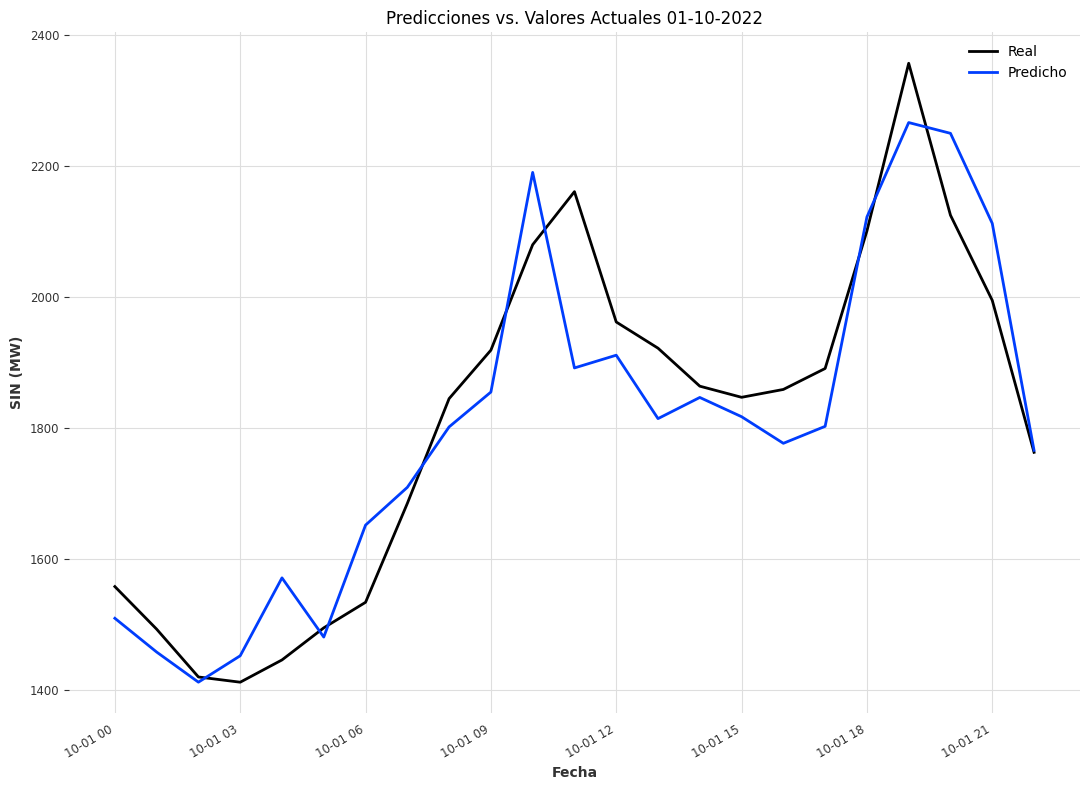

In [31]:
# Extracting the first week from actual and prediction data
valid_24h = val[24096:24119]
tft_pred_24h = tft_pred_val_04[24096:24119]
# tft_pred_1w_holiday = tft_pred_val_no_holiday[17544:17544+(24*7)]
# tft_pred_1w_05 = tft_pred_val_05[:24*7]

# Plotting model predictions for the first 24 hours
plt.figure(figsize=(11, 8))
valid_24h.plot(label='Real', lw=2)
tft_pred_24h.plot(label='Predicho', lw=2)
# tft_pred_1w_holiday.plot(label='TFT Con Feriados', lw=2)
plt.xlabel('Fecha')
plt.ylabel('SIN (MW)')
plt.title("Predicciones vs. Valores Actuales 01-10-2022")
plt.legend()

plt.tight_layout()
plt.savefig('best_day_06.png', format='png', dpi=300)

plt.show()

In [32]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Combine the dates with your data
data = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat, 'actual': val_flat})

# Filter for 2022 data
data_2022 = data[data['date'].dt.year == 2022]

# Group by week and calculate weekly MSE
weekly_error = data_2022.resample('W-Mon', on='date').apply(lambda x: mean_squared_error(x['actual'], x['prediction']))

# Sort the weeks by error and get the best and worst weeks
best_week = weekly_error.nsmallest(1)
worst_week = weekly_error.nlargest(1)

# Get indices for the best and worst weeks
best_week_start_index = data_2022.loc[data_2022['date'].dt.to_period('W') == best_week.index[0].to_period('W')].index[0]
best_week_end_index = data_2022.loc[data_2022['date'].dt.to_period('W') == best_week.index[0].to_period('W')].index[-1]

worst_week_start_index = data_2022.loc[data_2022['date'].dt.to_period('W') == worst_week.index[0].to_period('W')].index[0]
worst_week_end_index = data_2022.loc[data_2022['date'].dt.to_period('W') == worst_week.index[0].to_period('W')].index[-1]

# Print the results with indices
print(f"Best Week: {best_week.index[0].strftime('%Y-%m-%d')} to {(best_week.index[0] + pd.Timedelta(days=6)).strftime('%Y-%m-%d')}")
print(f"Indices for Best Week: Start - {best_week_start_index}, End - {best_week_end_index}")

print(f"Worst Week: {worst_week.index[0].strftime('%Y-%m-%d')} to {(worst_week.index[0] + pd.Timedelta(days=6)).strftime('%Y-%m-%d')}")
print(f"Indices for Worst Week: Start - {worst_week_start_index}, End - {worst_week_end_index}")

Best Week: 2022-09-12 to 2022-09-18
Indices for Best Week: Start - 23640, End - 23807
Worst Week: 2022-01-24 to 2022-01-30
Indices for Worst Week: Start - 18096, End - 18263


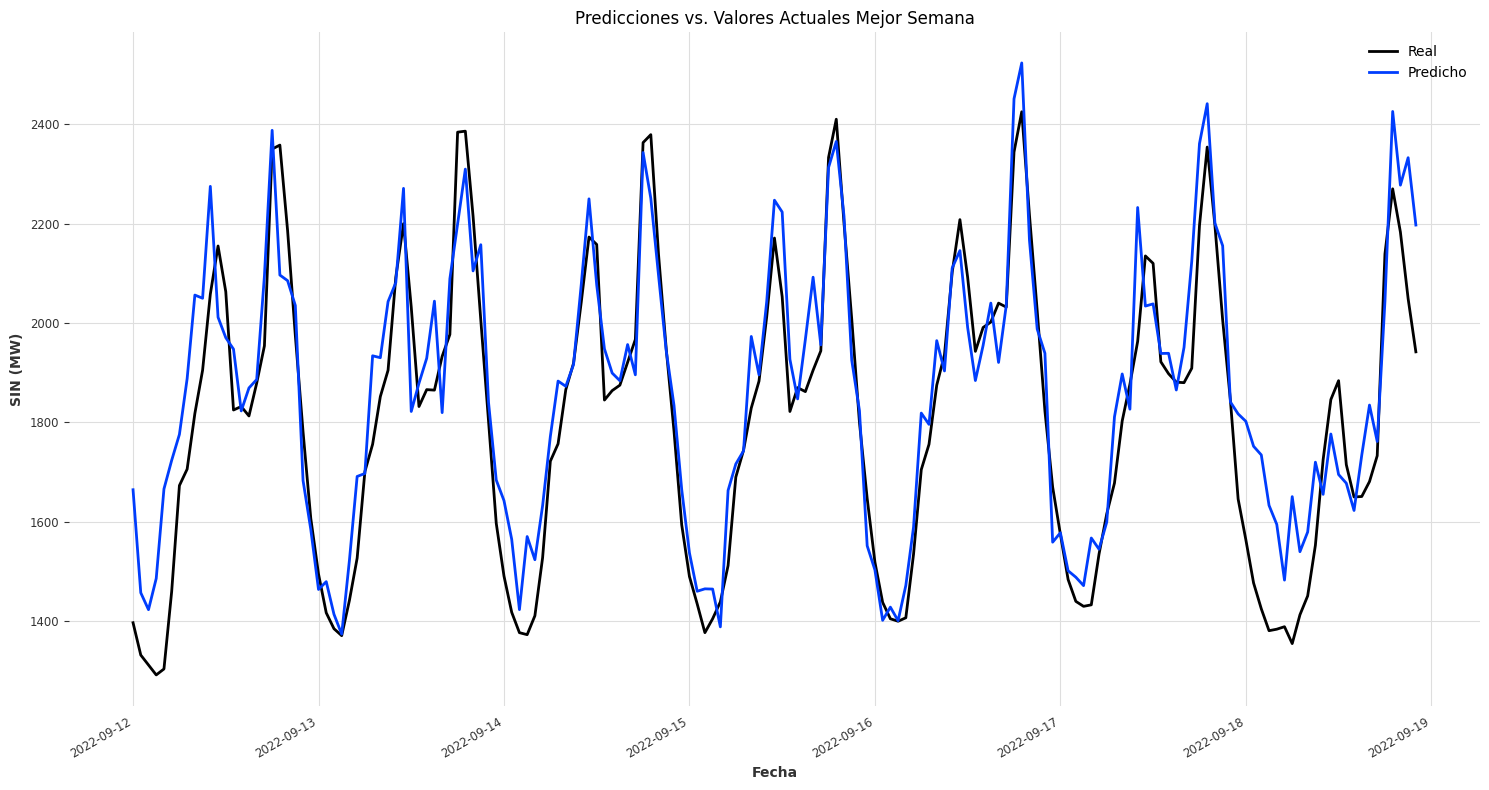

In [33]:
# Extracting the first week from actual and prediction data
valid_24h = val[23640:23807]
tft_pred_24h = tft_pred_val_04[23640:23807]
# tft_pred_1w_holiday = tft_pred_val_no_holiday[17544:17544+(24*7)]
# tft_pred_1w_05 = tft_pred_val_05[:24*7]

# Plotting model predictions for the first 24 hours
plt.figure(figsize=(15, 8))
valid_24h.plot(label='Real', lw=2)
tft_pred_24h.plot(label='Predicho', lw=2)
# tft_pred_1w_holiday.plot(label='TFT Con Feriados', lw=2)
plt.xlabel('Fecha')
plt.ylabel('SIN (MW)')
plt.title("Predicciones vs. Valores Actuales Mejor Semana")
plt.legend()

plt.tight_layout()
plt.savefig('best_week.png', format='png', dpi=300)

plt.show()

In [79]:
cov_val_df = cov_val[18096:18263]['Temperature']

In [80]:
temp_val_df = cov_val_df['Temperature']

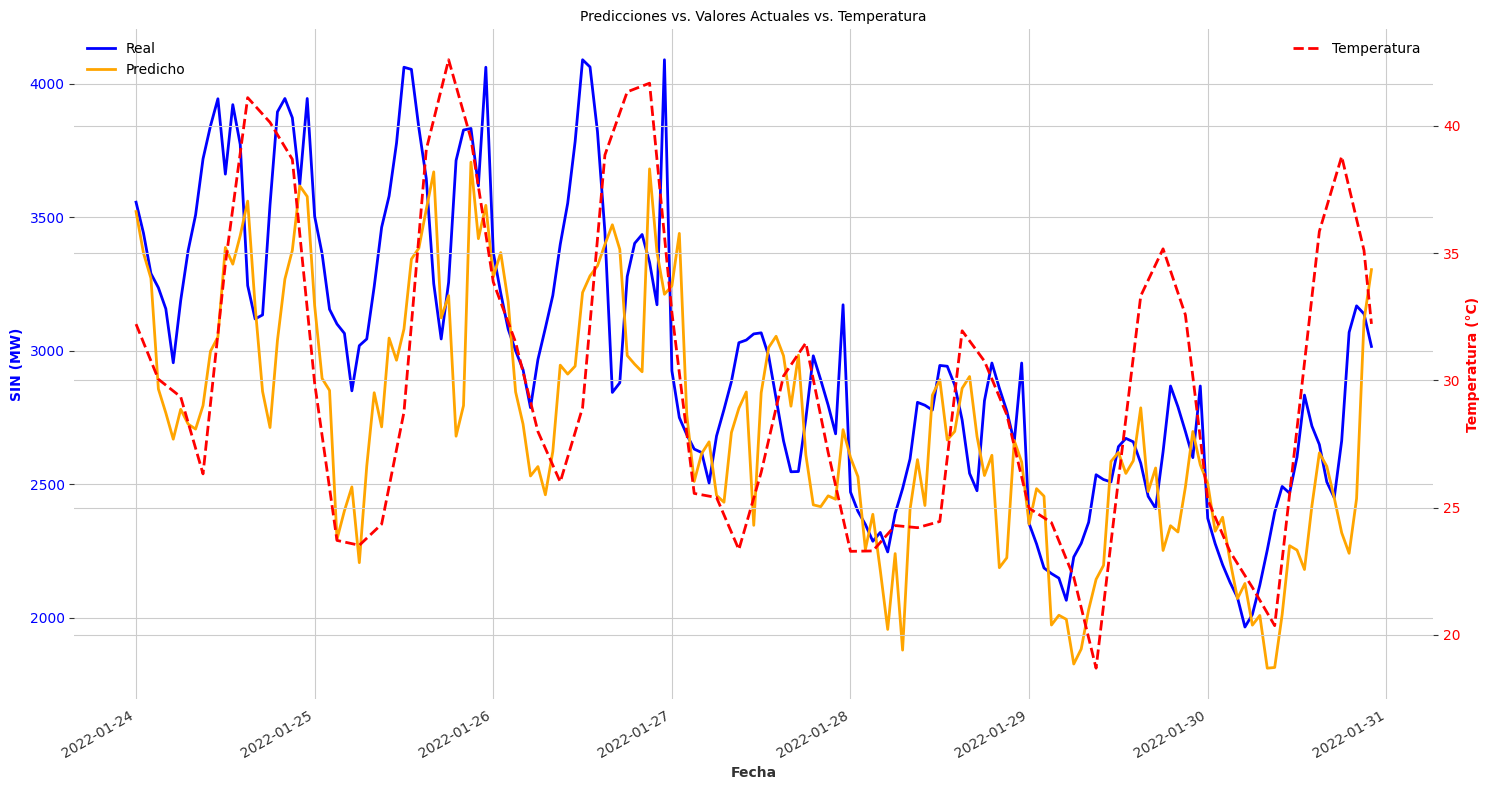

In [81]:
valid_24h

# Extracting the first week from actual and prediction data
valid_24h = val[18096:18263]
tft_pred_24h = tft_pred_val_04[18096:18263]
# tft_pred_1w_holiday = tft_pred_val_no_holiday[17544:17544+(24*7)]
# tft_pred_1w_05 = tft_pred_val_05[:24*7]

# Plotting model predictions for the first 24 hours
plt.figure(figsize=(15, 8))
ax1 = plt.gca()  # Get current axis

# Plotting SIN (MW) and predictions
valid_24h.plot(ax=ax1, label='Real', lw=2, color='blue')
tft_pred_24h.plot(ax=ax1, label='Predicho', lw=2, color='orange')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('SIN (MW)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Predicciones vs. Valores Actuales vs. Temperatura")
ax1.legend(loc='upper left')

# Creating a second axis for temperature
ax2 = ax1.twinx()
temp_val_df.plot(ax=ax2, label='Temperatura', lw=2, color='red', linestyle='--')
ax2.set_ylabel('Temperatura (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('worst_week_with_temperature.png', format='png', dpi=300)

plt.show()


<Axes: xlabel='Date'>

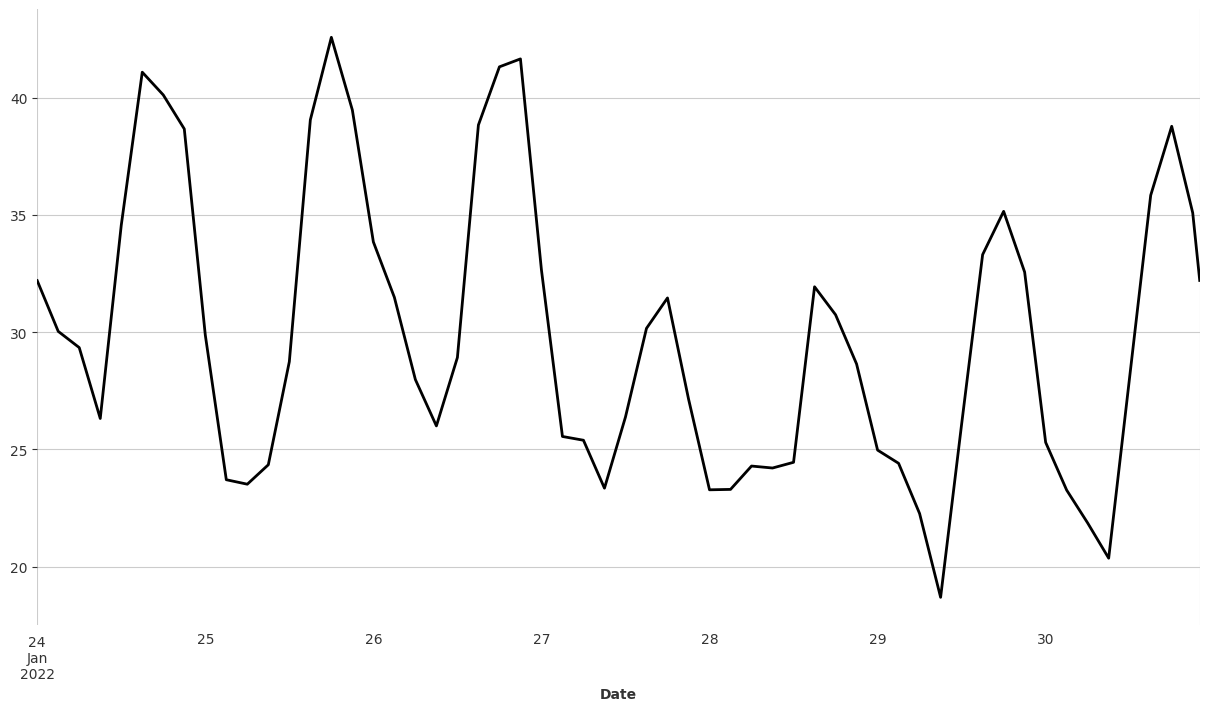

In [60]:
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 16
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(15, 8))
temp_val_df.plot(label='Temperatura', lw=2)

In [35]:
validation_range = ('2020-01-01', '2022-12-31')
dtin = pd.date_range(start=validation_range[0], end=validation_range[1], freq='H')

ixmax=np.argmax(val_arr.reshape(-1,24),axis=1)
hmaxerr=((tft_pred_val_arr_04.reshape(-1,24)[np.arange(tft_pred_val_arr_04.reshape(-1,24).shape[0]),ixmax]-np.max(val_arr.reshape(-1,24),axis=1))/np.max(val_arr.reshape(-1,24),axis=1))
hsup=np.percentile(hmaxerr,99)
hinf=np.percentile(hmaxerr,1)

0.14671947881579353
-0.05164973437786102
-0.29458996206521987
0.42516448795795414
0.17493926733732224
0.07678993977606297


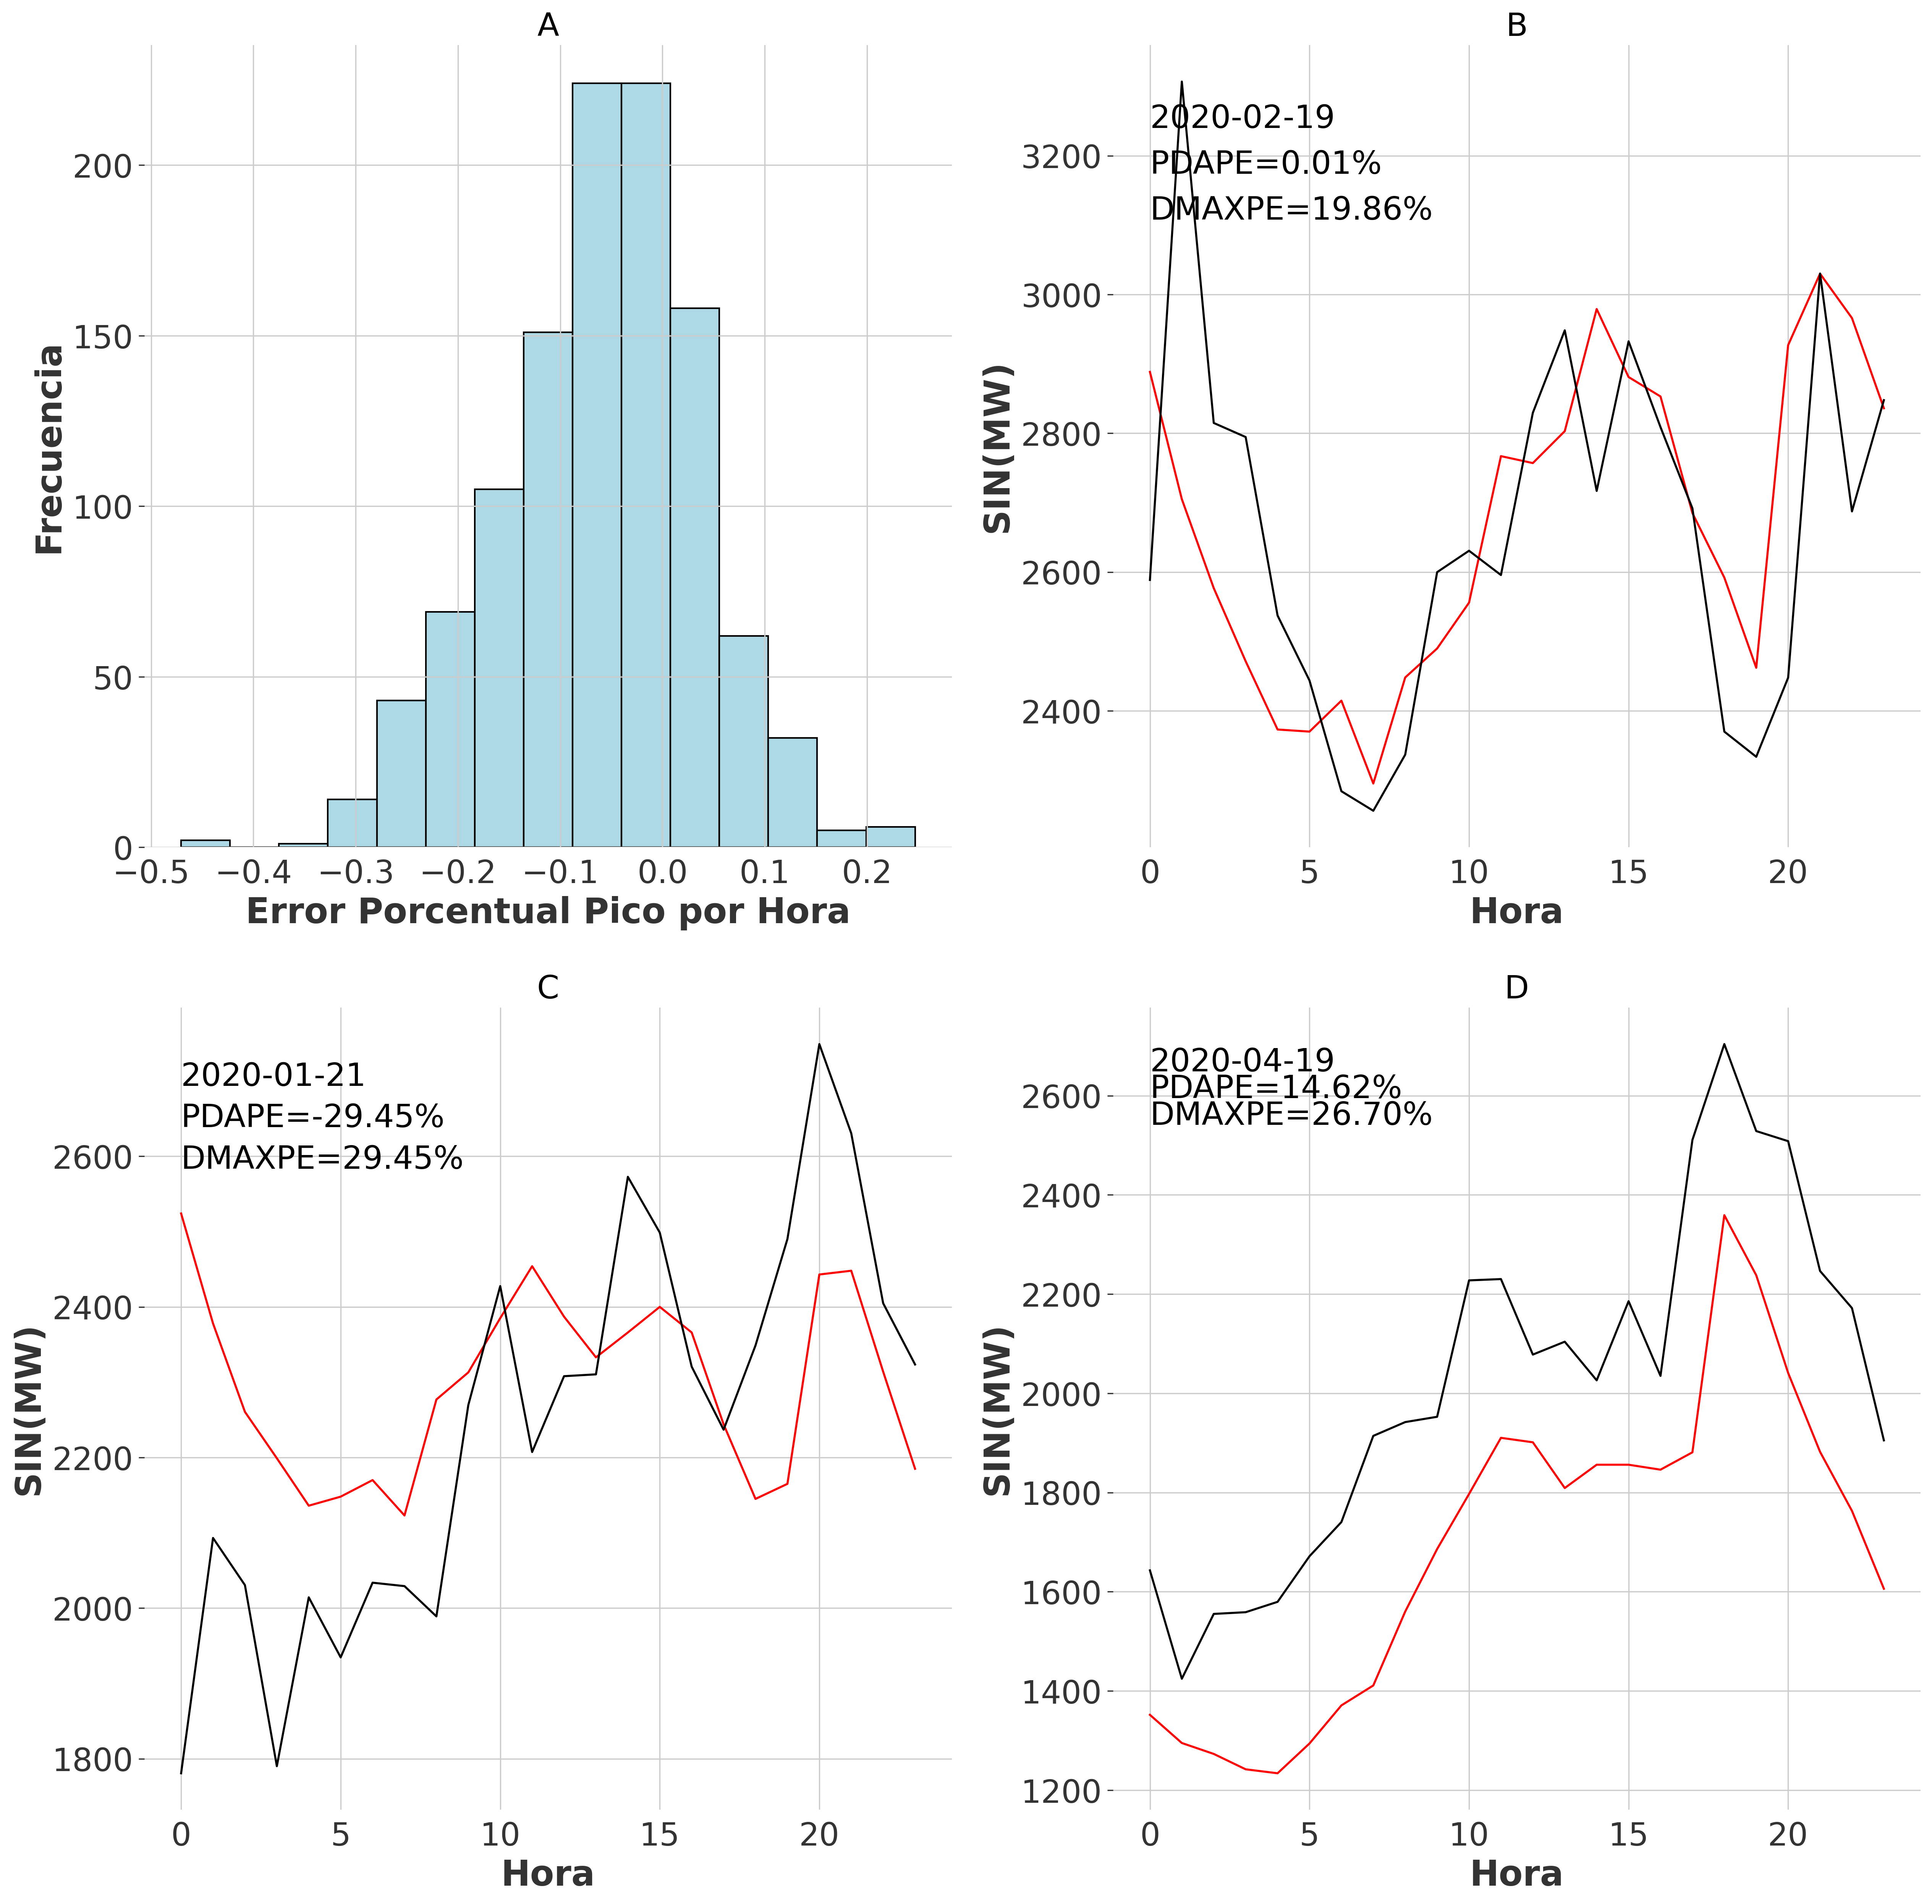

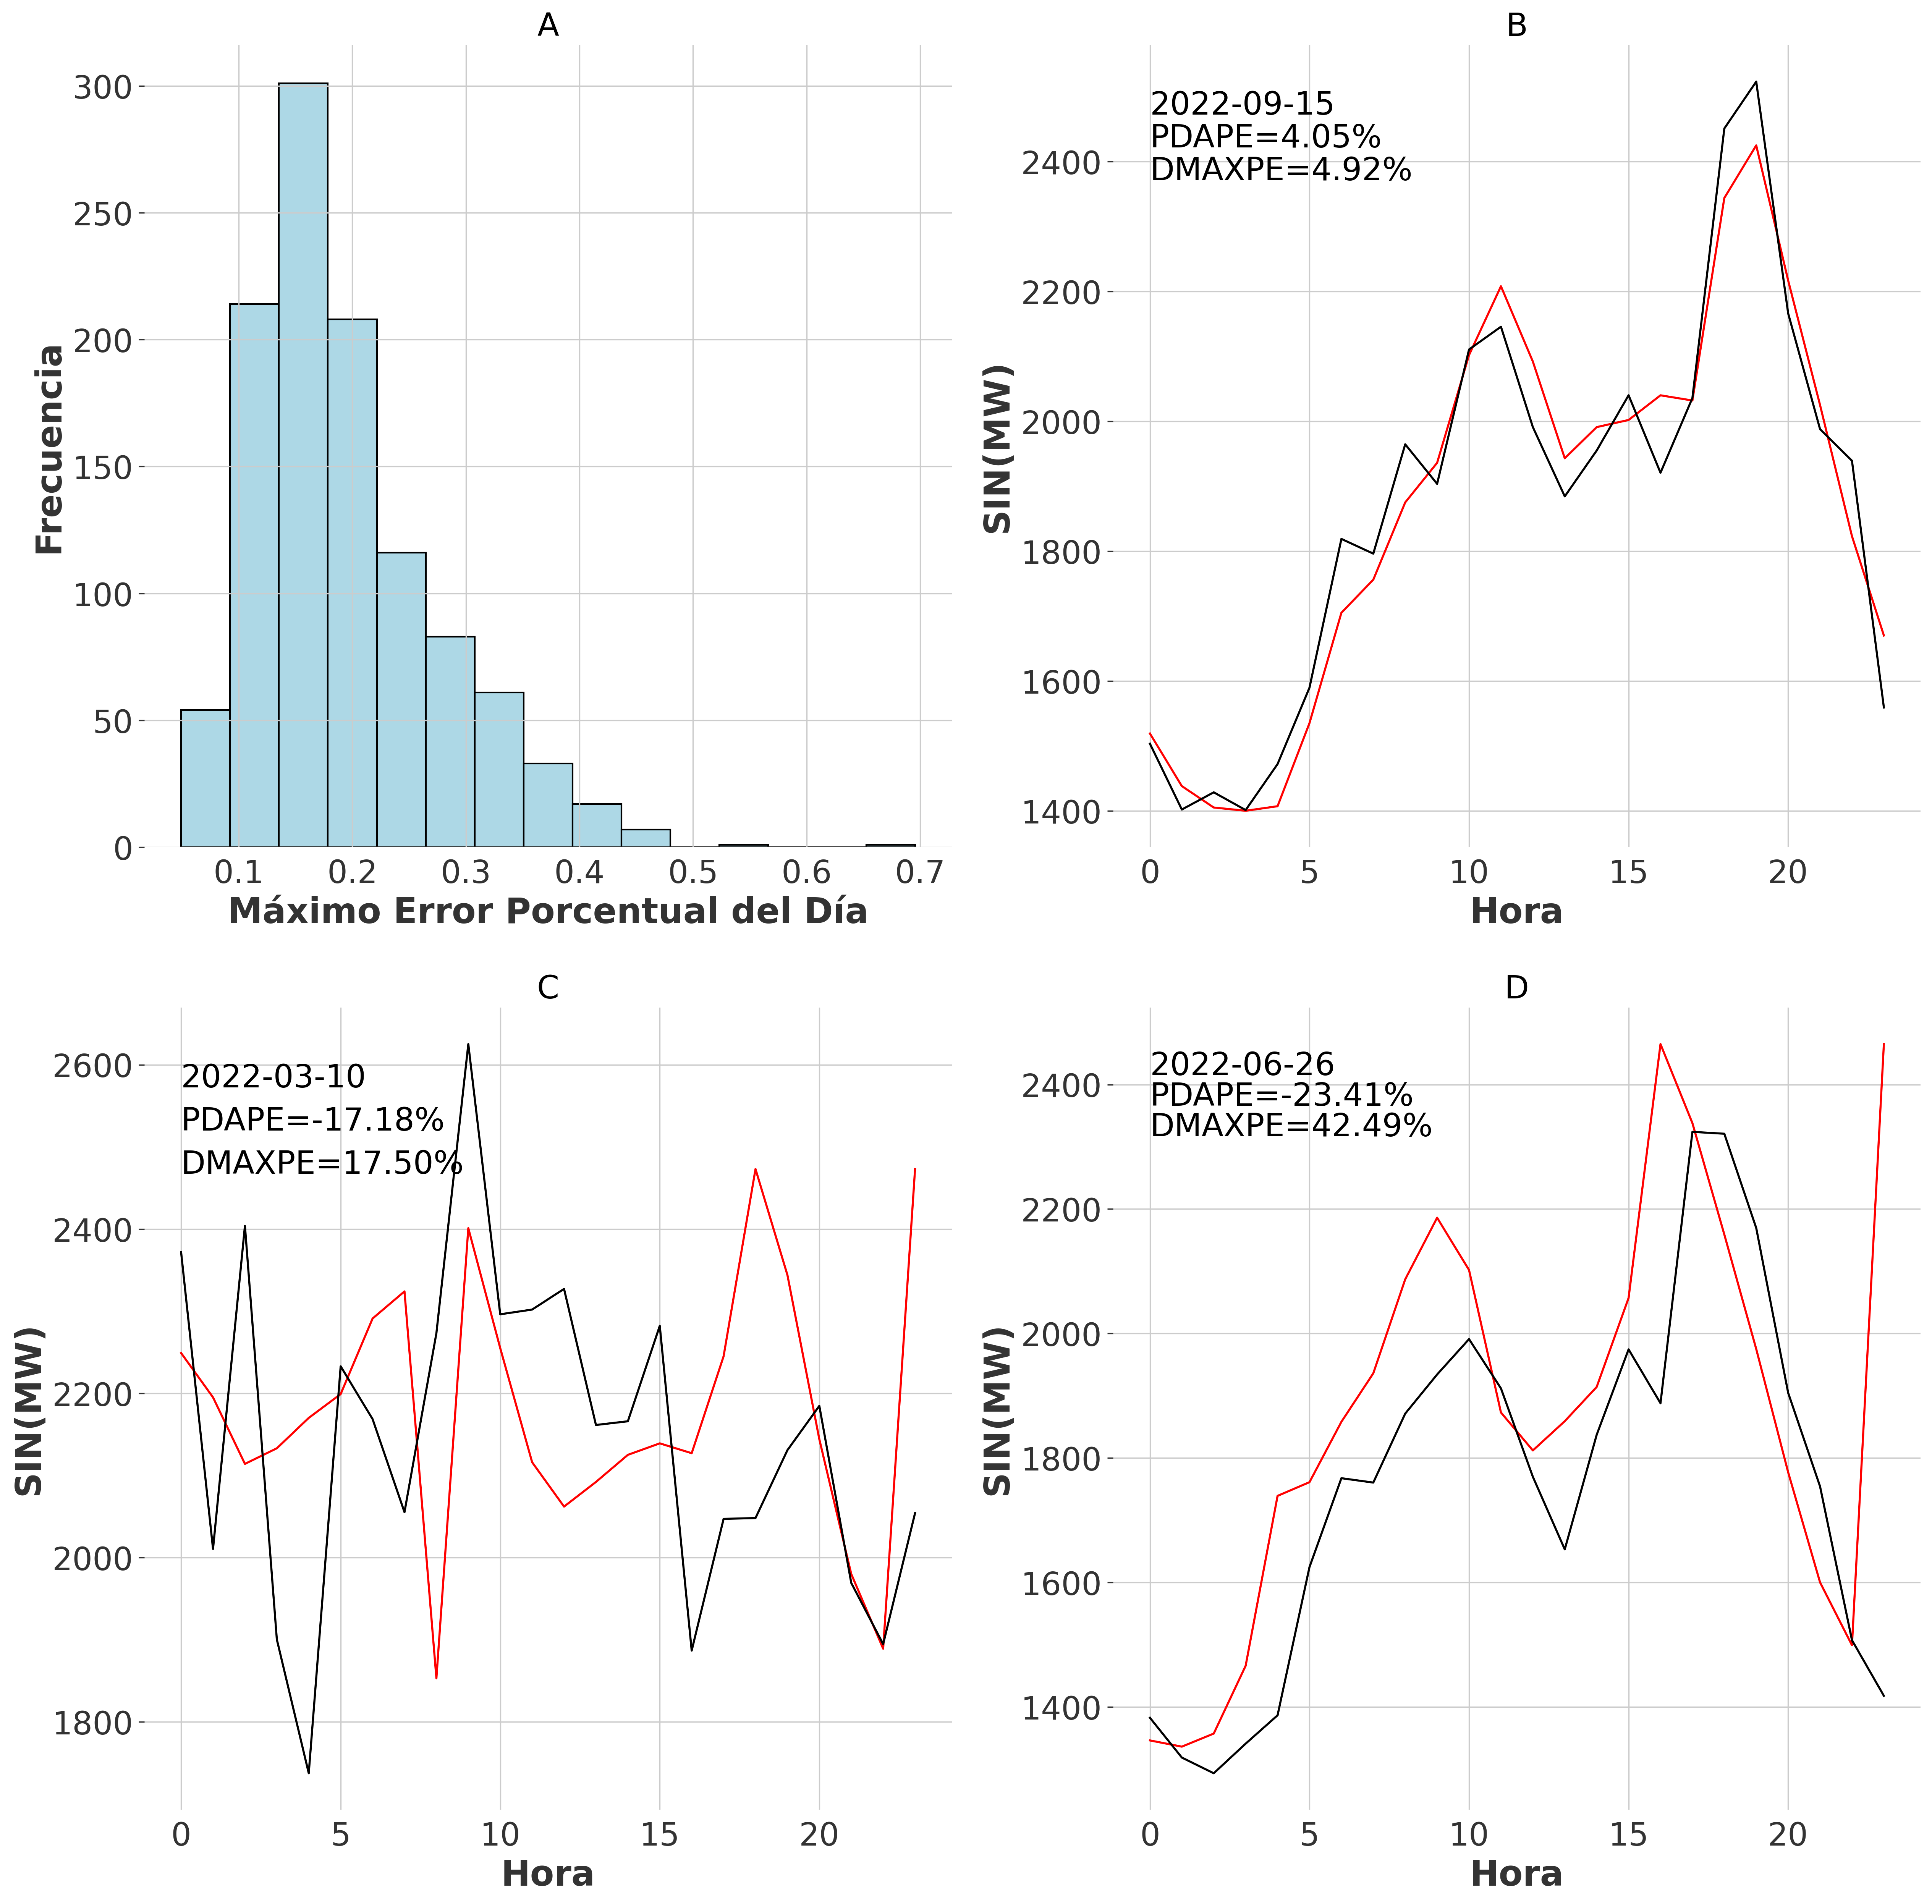

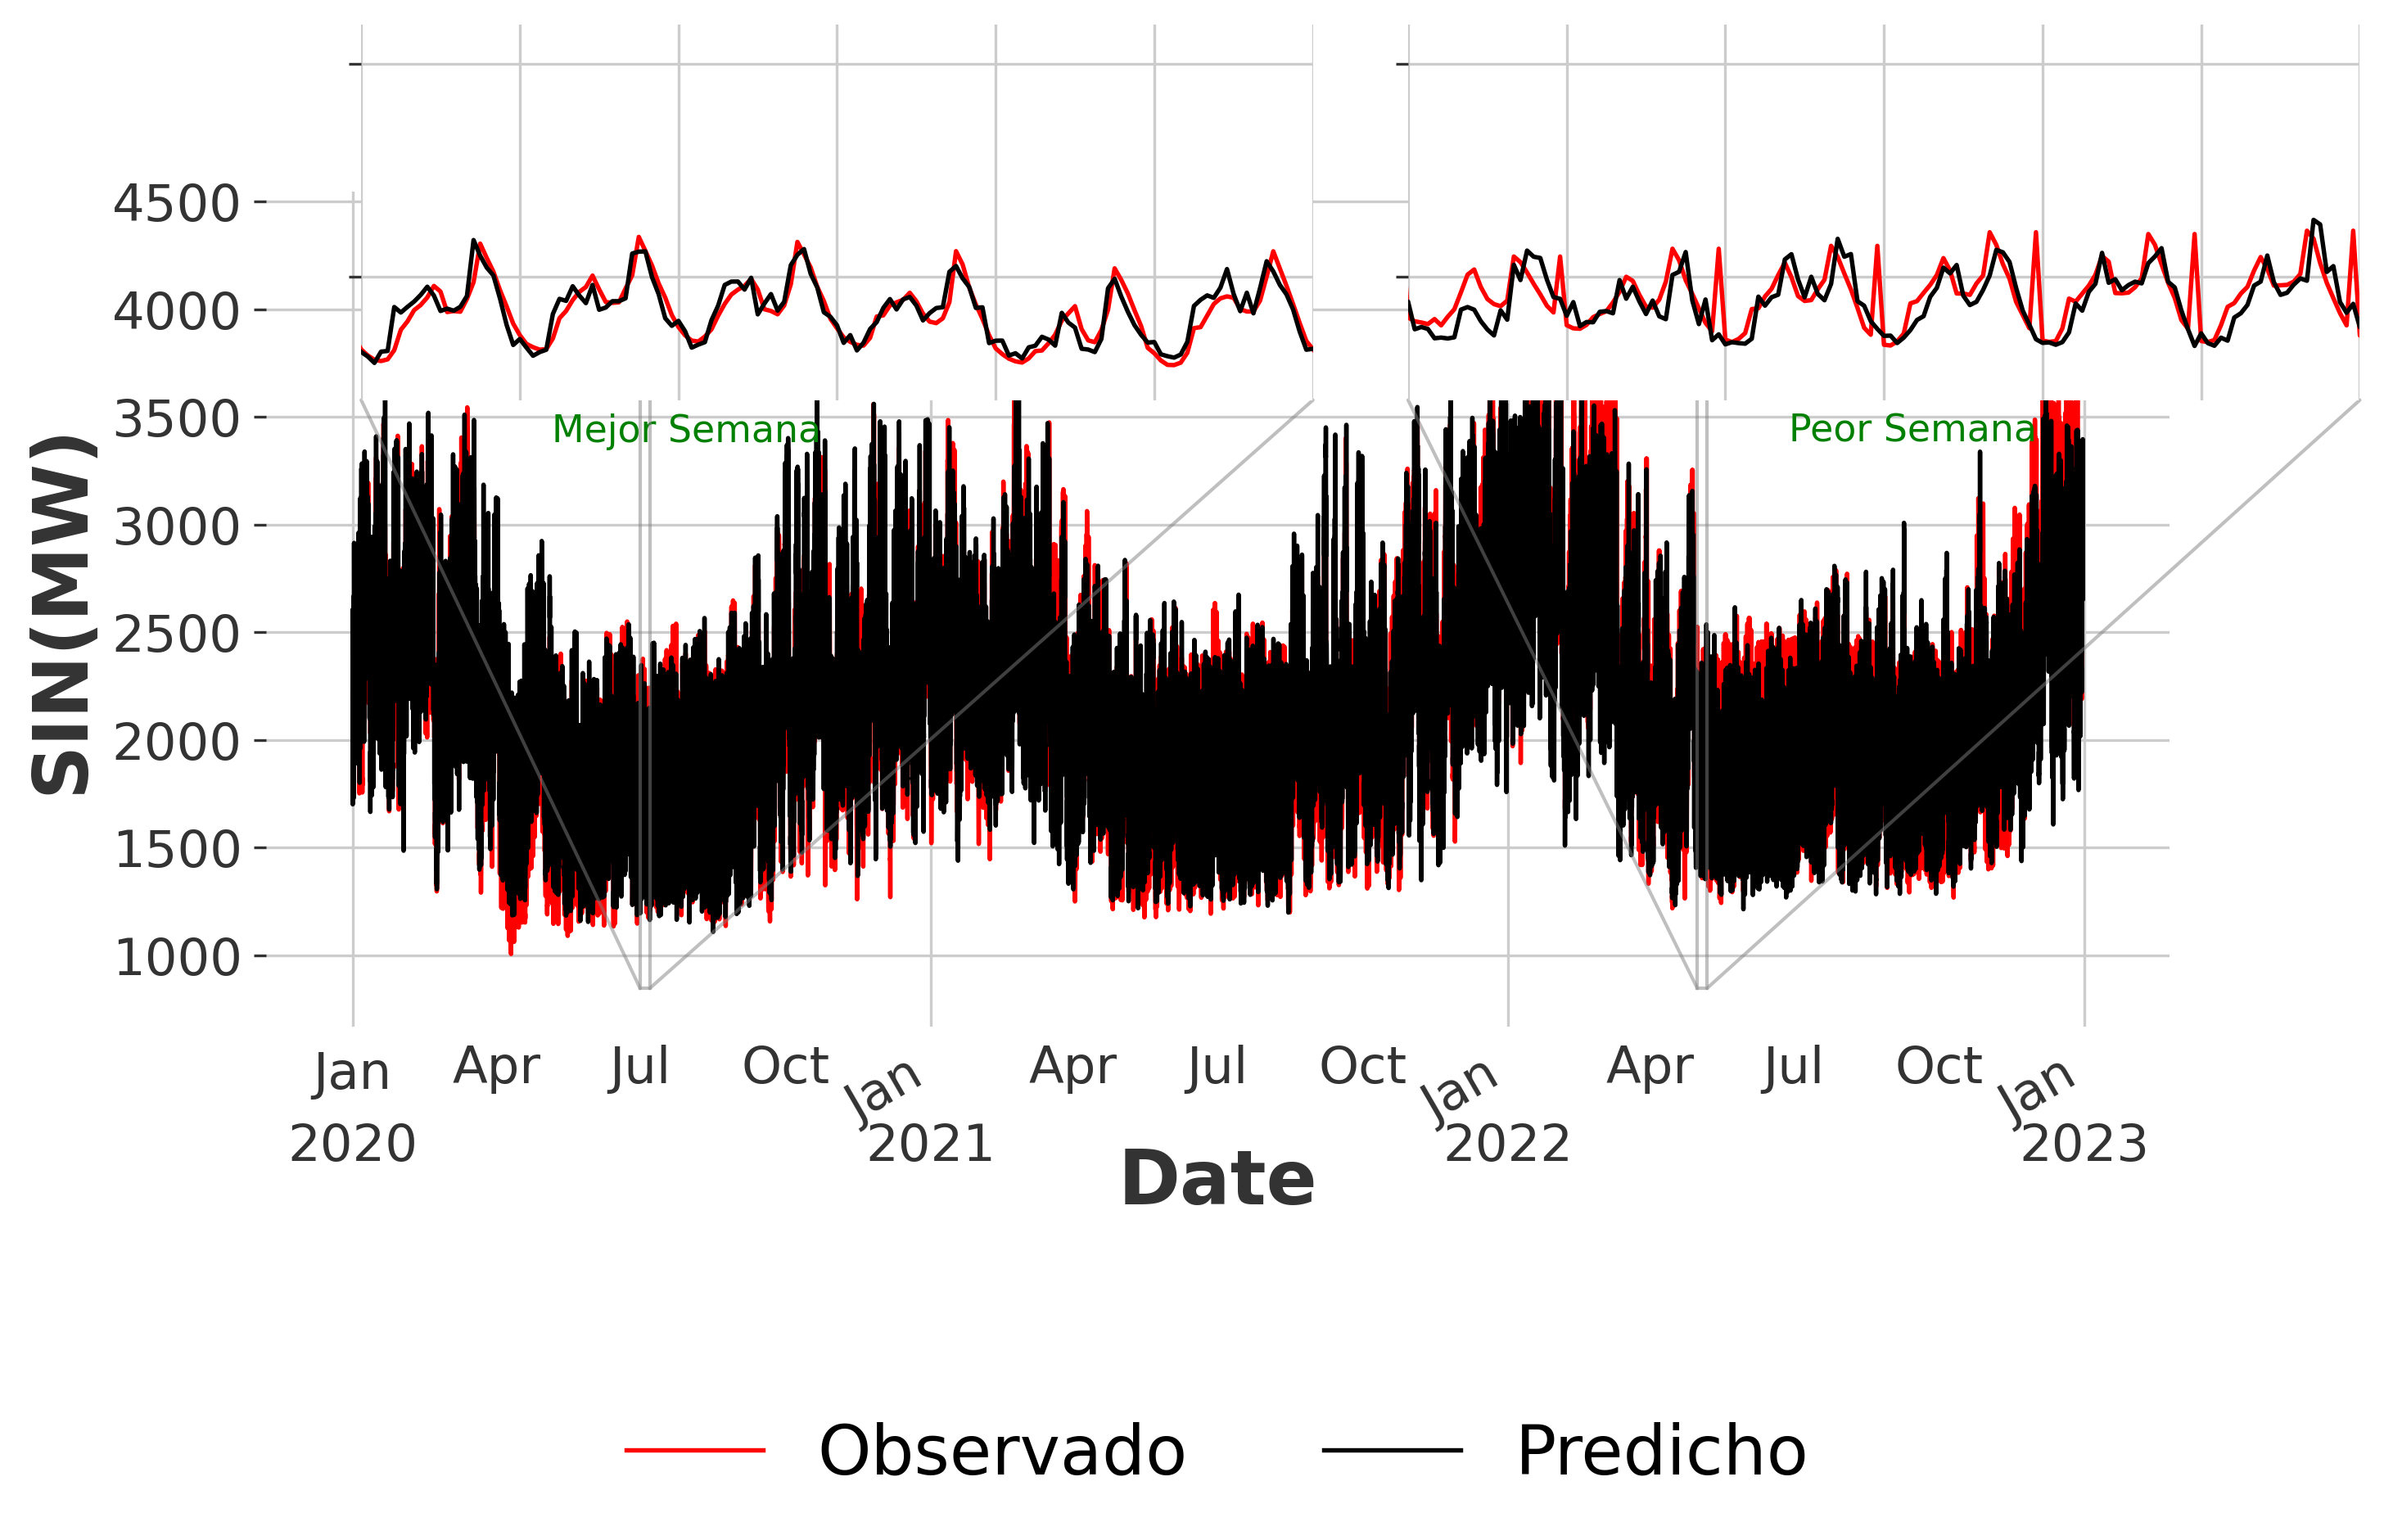

In [36]:
from matplotlib import rcParams
import matplotlib.dates as dates
from matplotlib import dates as mdates

# 2. Configure plot styles
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300
rcParams["font.size"] = 16
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

# 3. Calculate errors

# Assuming you have your predictions and actual values as:
# predictions: The predicted values from Darts
# y_validation: The actual values for validation

# Calculate hmaxerr (Hourly Peak Hour Percentage Error)
# ixmax = np.argmax(val_arr, axis=1)
# hmaxerr = ((tft_pred_val_arr_04.reshape(-1, 24)[np.arange(tft_pred_val_arr_04.reshape(-1, 24).shape[0]), ixmax] - np.max(val_arr, axis=1)) / np.max(val_arr, axis=1))

# Calculate maxerr (Max Percentage Error of the Day)
maxerr = np.max(np.abs(tft_pred_val_arr_04.reshape(-1, 24) - val_arr.reshape(-1, 24)), axis=1) / np.max(val_arr.reshape(-1, 24), axis=1)

print(np.percentile(hmaxerr,99))
print(np.percentile(hmaxerr,50))
print(np.percentile(hmaxerr,1))

fig, axes=plt.subplots(2, 2, figsize=(20, 20))
axes[0, 0].set_title('A')
axes[0, 1].set_title('B')
axes[1, 0].set_title('C')
axes[1, 1].set_title('D')
axes.flatten()[0].hist(hmaxerr,edgecolor="black",bins=15,color="lightblue");
axes.flatten()[0].set_xlabel('Error Porcentual Pico por Hora')
axes.flatten()[0].set_ylabel('Frecuencia')
#plt.savefig("testhistrmse.png")

lista=[]
lista.append(np.argmin(np.abs(hmaxerr )))

lista.append(np.argmin(np.abs(hmaxerr - np.percentile(hmaxerr,1))))
lista.append(np.argmin(np.abs(hmaxerr -np.percentile(hmaxerr, 99))))
i=1
for dia in lista:
    maxd=max([np.max(val_arr.reshape(-1,24)[dia,:]),np.max(tft_pred_val_arr_04.reshape(-1,24)[dia,:])])
    axes.flatten()[i].text(0,maxd*0.98 ,dtin[(dia-1)*24].date().strftime("%Y-%m-%d"))
    axes.flatten()[i].text(0,maxd*0.96 ,"PDAPE="+"{:.2%}".format(hmaxerr[dia]))
    axes.flatten()[i].text(0,maxd*0.94 ,"DMAXPE="+"{:.2%}".format(maxerr[dia]))
    axes.flatten()[i].plot(val_arr.reshape(-1,24)[dia,:],color='red')
    axes.flatten()[i].plot(tft_pred_val_arr_04.reshape(-1,24)[dia,:])
    axes.flatten()[i].set_xlabel('Hora')
    axes.flatten()[i].set_ylabel('SIN(MW)')

    i=i+1

#fig.savefig("PanelHPE.png")

fig, axes=plt.subplots(2, 2, figsize=(20, 20))
axes[0, 0].set_title('A')
axes[0, 1].set_title('B')
axes[1, 0].set_title('C')
axes[1, 1].set_title('D')

axes.flatten()[0].hist(maxerr,edgecolor="black",bins=15, color="lightblue");
axes.flatten()[0].set_xlabel('Máximo Error Porcentual del Día')
axes.flatten()[0].set_ylabel('Frecuencia')
#plt.savefig("testhistrmse.png")

lista=[]
lista.append(np.argmin(np.abs(maxerr)))
lista.append(np.argmin(np.abs(maxerr -np.percentile(maxerr, 50))))
lista.append(np.argmin(np.abs(maxerr -np.percentile(maxerr, 99))))
i=1
for dia in lista:
    maxd=max([np.max(val_arr.reshape(-1,24)[dia,:]),np.max(tft_pred_val_arr_04.reshape(-1,24)[dia,:])])
    axes.flatten()[i].text(0,maxd*0.98 ,dtin[(dia-1)*24].date().strftime("%Y-%m-%d"))
    axes.flatten()[i].text(0,maxd*0.96 ,"PDAPE="+"{:.2%}".format(hmaxerr[dia]))
    axes.flatten()[i].text(0,maxd*0.94 ,"DMAXPE="+"{:.2%}".format(maxerr[dia]))
    axes.flatten()[i].plot(val_arr.reshape(-1,24)[dia,:],color='red')
    axes.flatten()[i].plot(tft_pred_val_arr_04.reshape(-1,24)[dia,:])
    axes.flatten()[i].set_xlabel('Hora')
    axes.flatten()[i].set_ylabel('SIN(MW)')
    i=i+1

#fig.savefig("PanelMAERR.png")


print(np.percentile(maxerr,99))
print(np.percentile(maxerr,50))
print(np.percentile(maxerr,1))


fig, ax = plt.subplots(figsize=(10, 5))
fmt_month = mdates.MonthLocator(interval=3)
    # Minor ticks every year.
fmt_year = mdates.YearLocator()
ax.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # fontsize for month labels
ax.tick_params(labelsize=15, which='both')
    # create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=15)
ax.plot(dtin,val_arr.reshape(-1)[:len(dtin)],color='red',label='Observado')
ax.plot(dtin, tft_pred_val_arr_04[:len(dtin)],label='Predicho')
# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('SIN(MW)')
zoom_start =  pd.to_datetime('2020-07-01')
zoom_end =  pd.to_datetime('2020-07-07')
axins = ax.inset_axes([0.05, 0.75, 0.5, 0.45])  # Adjust the position and size of the zoomed-in box
axins.plot(dtin,val_arr.reshape(-1)[:len(dtin)], color='red',label='Observado')
axins.plot(dtin, tft_pred_val_arr_04[:len(dtin)], label='Predicho')
axins.set_xlim(zoom_start, zoom_end)
#axins.set_ylim(-2, 2)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Add a box and annotate the zoomed-in region
ax.indicate_inset_zoom(axins)
ax.annotate('Mejor Semana', xy=(0.15, 0.7), xycoords='axes fraction', fontsize=11, color='green')

zoom_start =  pd.to_datetime('2022-05-01')
zoom_end =  pd.to_datetime('2022-05-07')
axins = ax.inset_axes([0.6, 0.75, 0.5, 0.45])  # Adjust the position and size of the zoomed-in box
axins.plot(dtin,val_arr.reshape(-1)[:len(dtin)], color='red',label='Observado')
axins.plot(dtin, tft_pred_val_arr_04[:len(dtin)], label='Predicho')
axins.set_xlim(zoom_start, zoom_end)
#axins.set_ylim(-2, 2)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Add a box and annotate the zoomed-in region
ax.indicate_inset_zoom(axins)
ax.annotate('Peor Semana', xy=(0.8, 0.7), xycoords='axes fraction', fontsize=11, color='green')

# Show the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=2)

# Adjust the layout to prevent overlapping labels
fig.autofmt_xdate()

#fig.savefig("Prediction.png")
# Display the plot


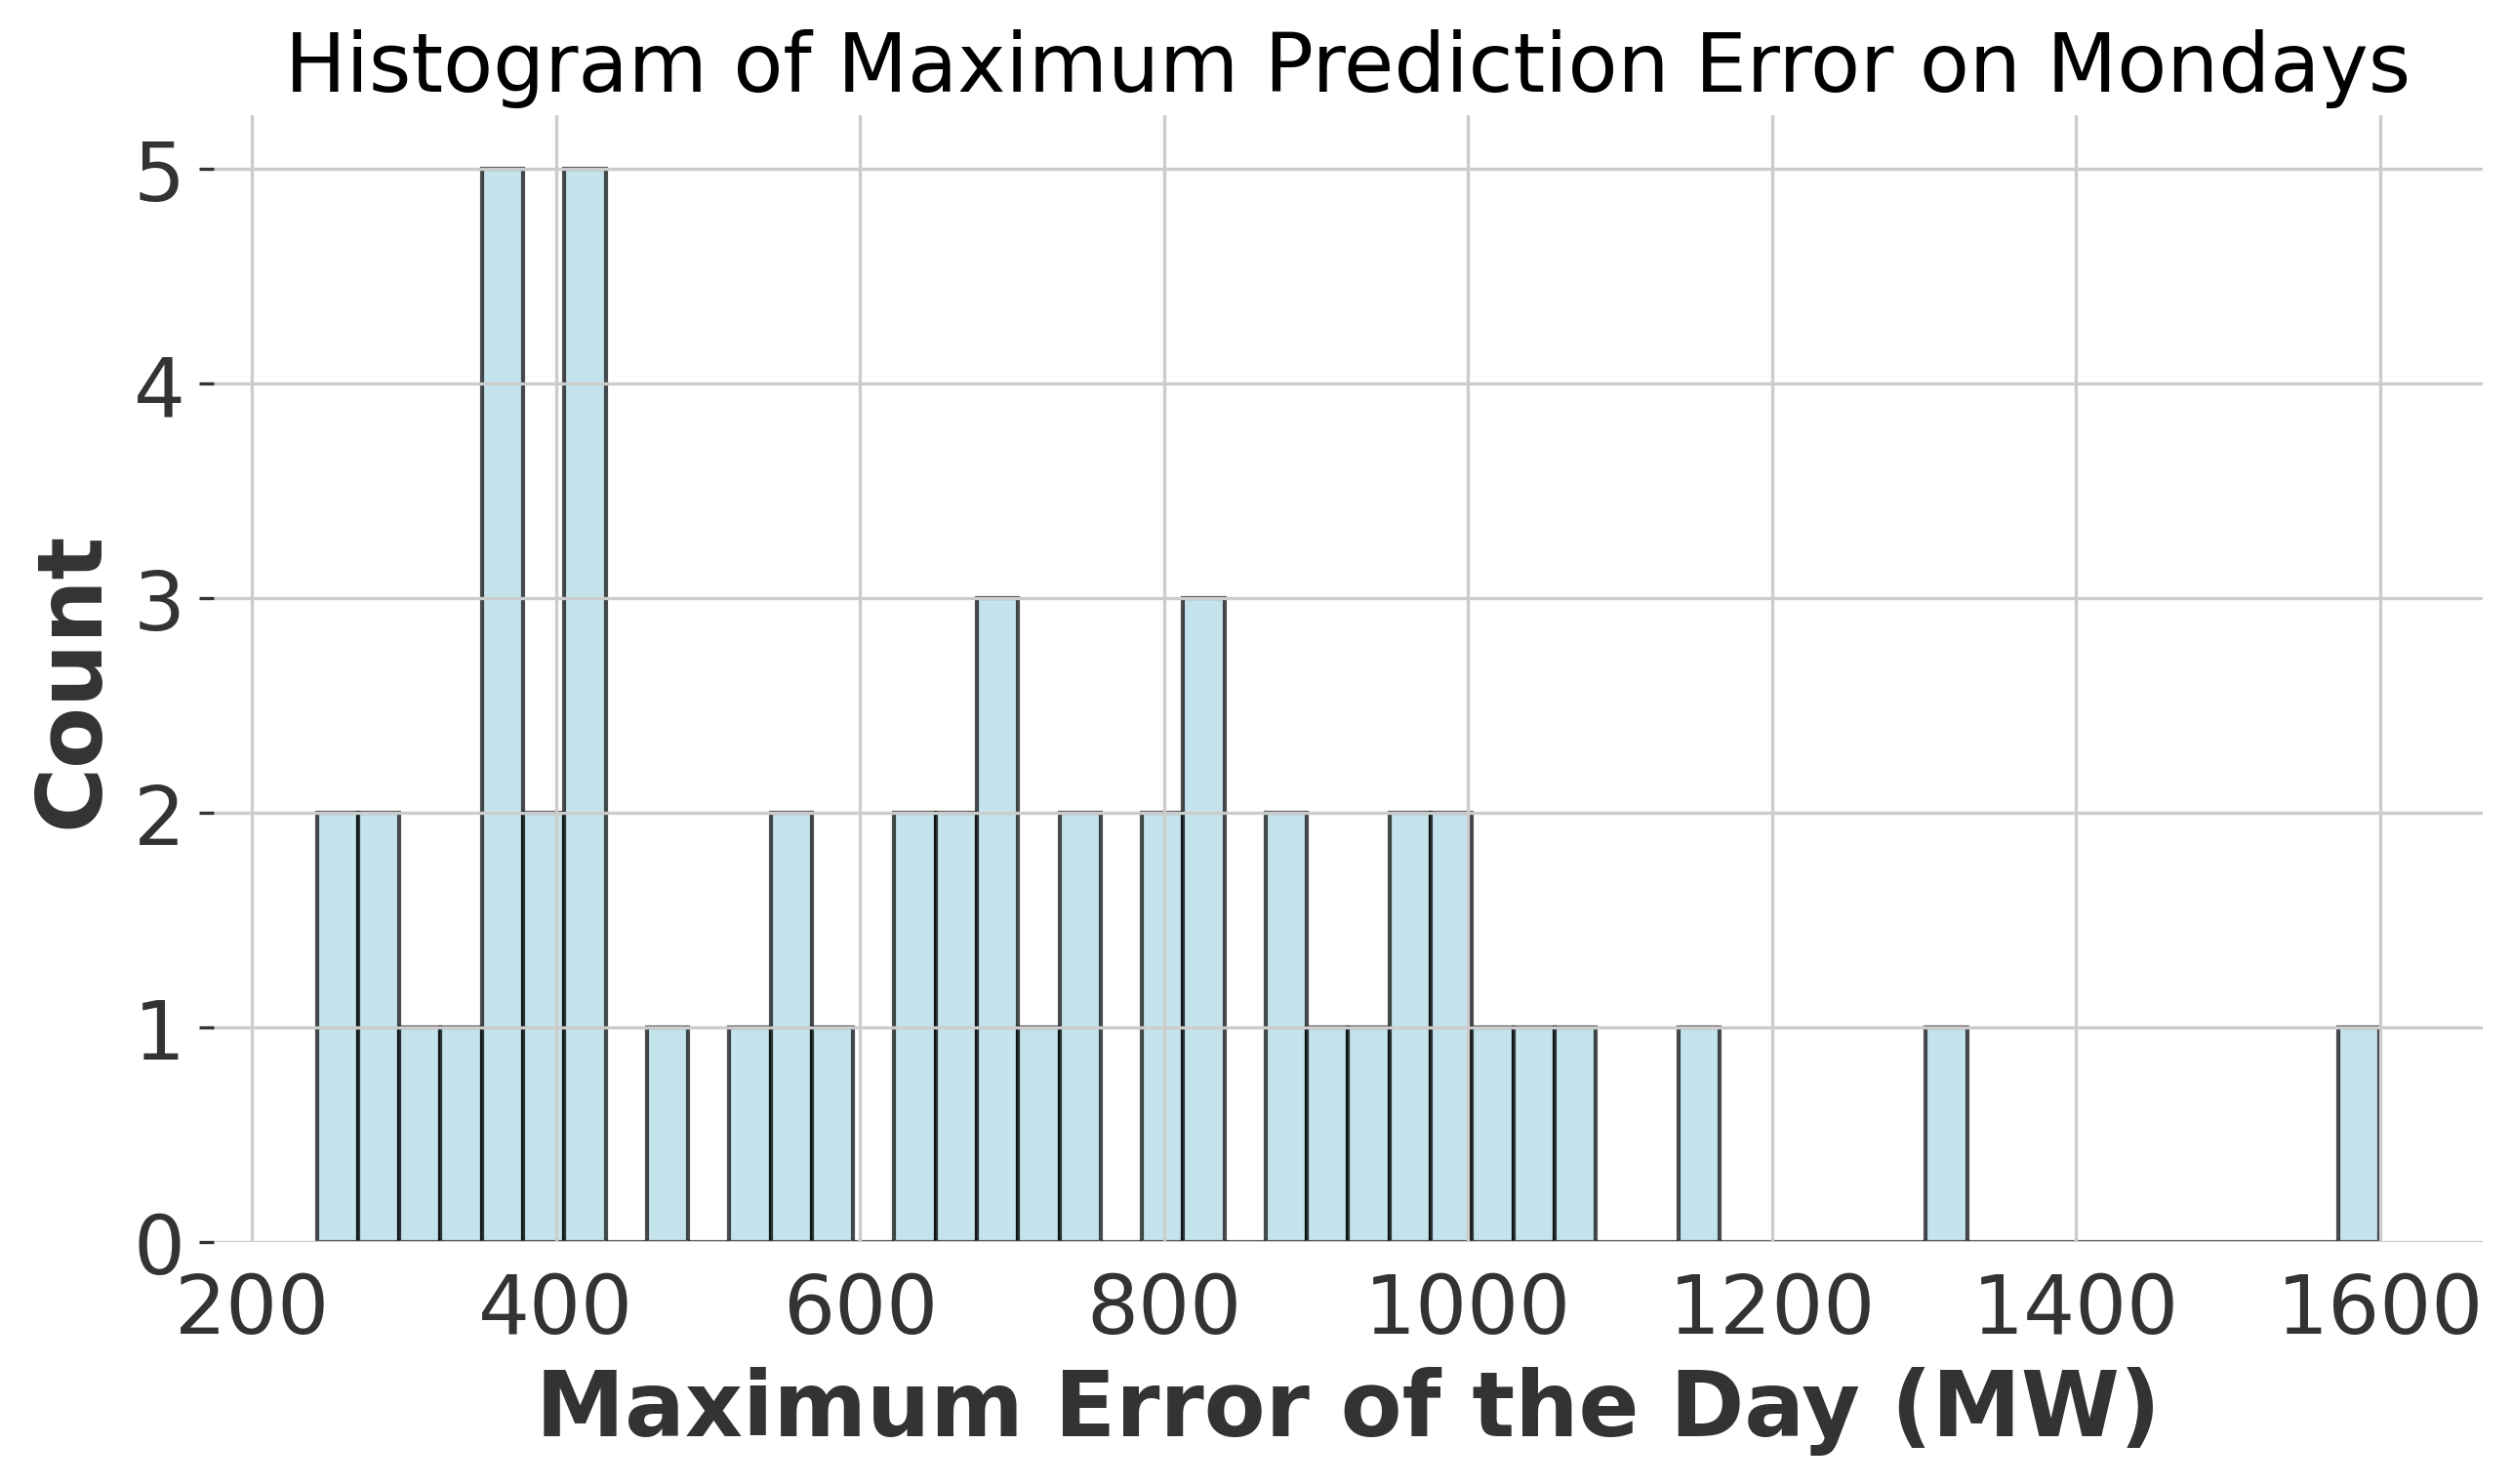

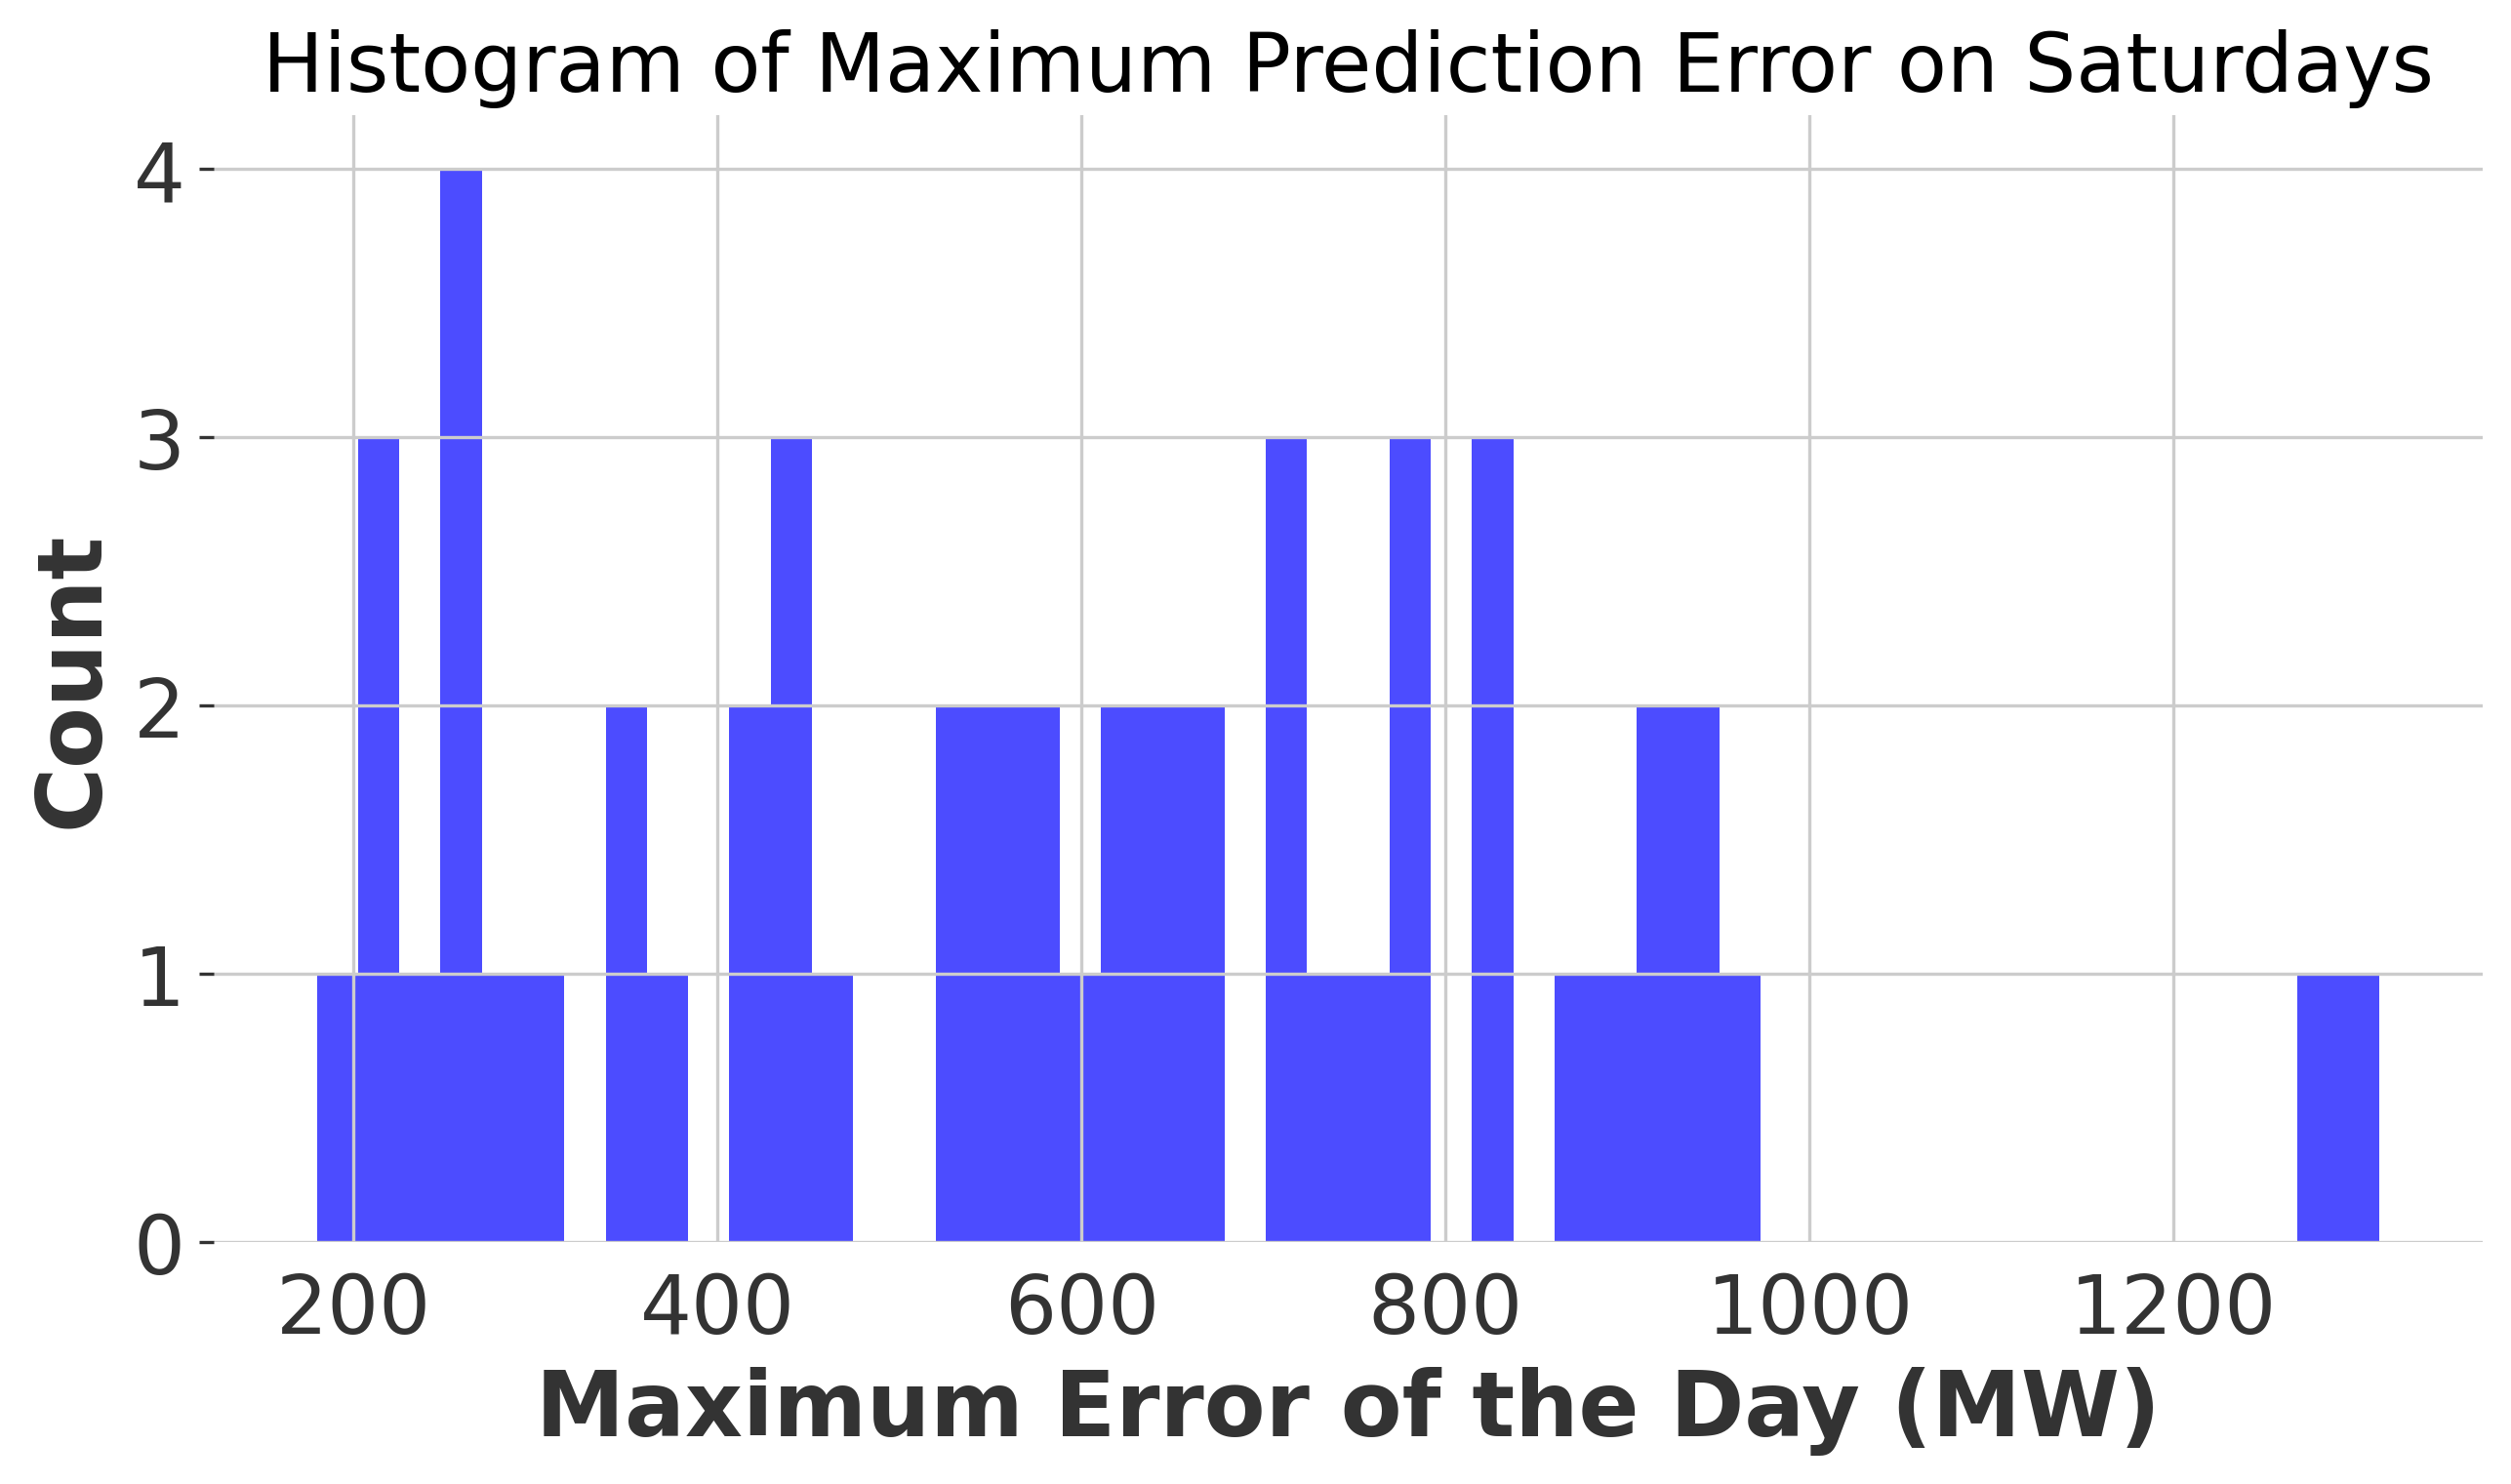

In [37]:
# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Create a date range for your dataset
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Make sure the lengths match
if len(dates) != len(tft_pred_flat) or len(dates) != len(val_flat):
    raise ValueError("Date range and data arrays do not match in length.")

# Combine the dates with your data
tft_pred_df = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat})
val_df = pd.DataFrame({'date': dates, 'actual': val_flat})

# Filter for 2022 data
tft_pred_2022 = tft_pred_df[tft_pred_df['date'].dt.year == 2022]
val_2022 = val_df[val_df['date'].dt.year == 2022]

# Filter for Mondays and Saturdays
mondays_data = data_2022[data_2022['date'].dt.weekday == 0]  # 0 is Monday
saturdays_data = data_2022[data_2022['date'].dt.weekday == 5]  # 5 is Saturday

# Calculate the maximum error for each Monday and Saturday
mondays_max_error = mondays_data.groupby(mondays_data['date'].dt.date).apply(
    lambda x: np.max(np.abs(x['prediction'] - x['actual'])))
saturdays_max_error = saturdays_data.groupby(saturdays_data['date'].dt.date).apply(
    lambda x: np.max(np.abs(x['prediction'] - x['actual'])))

# Plot histogram for Mondays
plt.figure(figsize=(10, 5))
plt.hist(mondays_max_error, bins=50, alpha=0.7, edgecolor="black", color="lightblue")
plt.title('Histogram of Maximum Prediction Error on Mondays')
plt.xlabel('Maximum Error of the Day (MW)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot histogram for Saturdays
plt.figure(figsize=(10, 5))
plt.hist(saturdays_max_error, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Maximum Prediction Error on Saturdays')
plt.xlabel('Maximum Error of the Day (MW)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

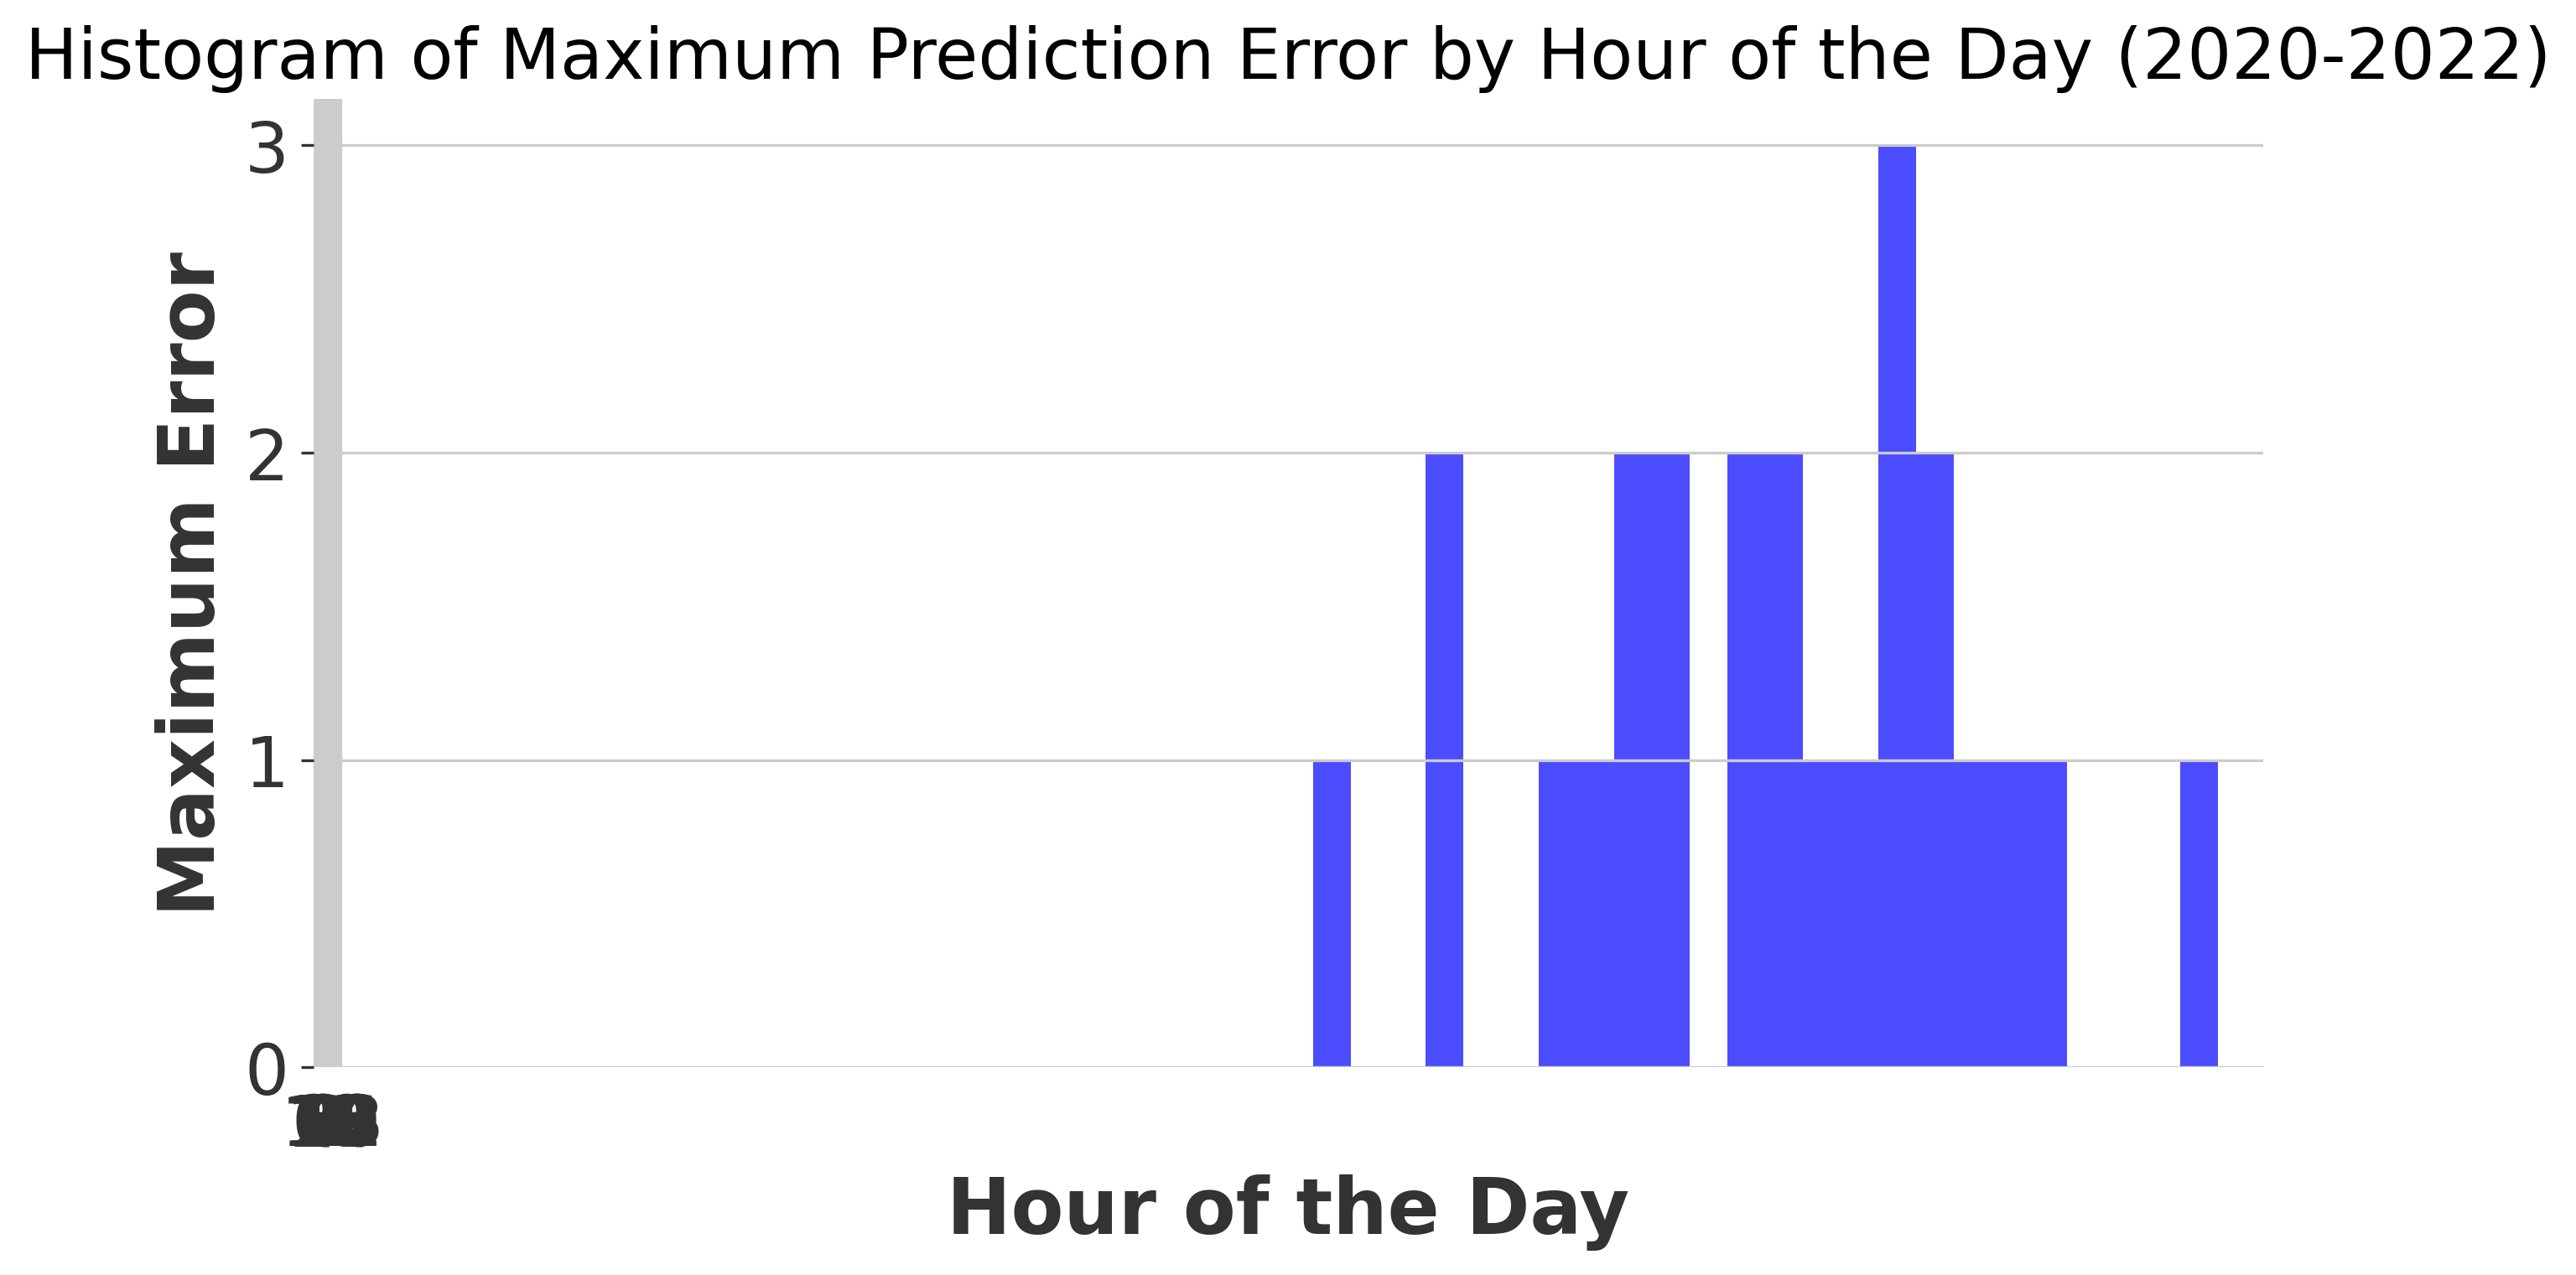

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Flatten the arrays if they are not 1-dimensional
tft_pred_flat = tft_pred_val_arr_04.flatten() if tft_pred_val_arr_04.ndim > 1 else tft_pred_val_arr_04
val_flat = val_arr.flatten() if val_arr.ndim > 1 else val_arr

# Assuming the start date of your dataset is January 1, 2020
start_date = '2020-01-01'
end_date = '2022-12-31 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')  # Hourly frequency

# Assuming tft_pred_val_arr_01 and val_arr are already defined and are 1-dimensional
# Combine the dates with your data into a DataFrame
data = pd.DataFrame({'date': dates, 'prediction': tft_pred_flat, 'actual': val_flat})

# Group data by hour of the day and calculate max error for each hour
hourly_max_error = data.groupby(data['date'].dt.hour).apply(
    lambda x: np.max(np.abs(x['prediction'] - x['actual'])))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(hourly_max_error, bins=24, alpha=0.7, color='blue')  # 24 bins for 24 hours
plt.title('Histogram of Maximum Prediction Error by Hour of the Day (2020-2022)')
plt.xlabel('Hour of the Day')
plt.ylabel('Maximum Error')
plt.xticks(range(24))  # Set x-ticks to be every hour
plt.grid(True)
plt.show()